### This is code for the Kaggle competition that was organized by Renthop and Two Sigma https://www.kaggle.com/c/two-sigma-connect-rental-listing-inquiries
#### In this competition participants predict the number of inquiries a new apartment listing receives based on the listing’s creation date and other features.

## Step 0. Import Libraries

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes
import seaborn as sns
import random
import numpy as np
import cv2
import os, os.path
import glob
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import xgboost as xgb
#import gmaps
#import gmaps.datasets
#import mpl_toolkits
#from mpl_toolkits.basemap import Basemap
#from geopy.geocoders import Nominatim
import math
#import gmplot


%matplotlib inline

## Step 1. Loading and visualization of data
#### Analysis of correlations between data columns is analyzed at this step.

In [116]:
#LOADING TRAINING DATA
data = pd.read_json('train.json')
data.sort_index()


,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",medium,40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",low,40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",medium,40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",low,40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street
16,1.0,3,300d27d8ba2adbcbc8c6f2bcbc1c6f9d,2016-06-28 05:59:06,This spectacular converted 3 bed apartment all...,East 16th Street,"[Doorman, Elevator, Loft, Dishwasher, Hardwood...",low,40.7348,7226687,-73.9865,30a7951cfc21240e8c46b2d079d292e5,[https://photos.renthop.com/2/7226687_4ea22bf1...,7200,145 East 16th Street
18,2.0,3,0d01cabe55fa5192cdbcabd5c585c1ea,2016-06-08 06:21:36,AMAZING DEAL!! BRAND NEW RENOVATIONS IN THIS H...,East 13th Street,"[Fireplace, Laundry in Unit, Dishwasher, Hardw...",low,40.7302,7126989,-73.9826,9f39caedae295bf81e67463e6fd0af40,[https://photos.renthop.com/2/7126989_a74ab3da...,6000,410 East 13th Street
19,1.0,0,d48767c37a934daaf0bbb0e58c755d0c,2016-06-05 05:28:22,No Fee Large Renovated Sun Splashed Studio. Wa...,York Avenue,"[Elevator, Laundry in Building, Dishwasher, Ha...",high,40.7769,7114138,-73.9467,9cbfa7a31ae9dfba70b4383636d99788,[https://photos.renthop.com/2/7114138_68d035c3...,1945,1661 York Avenue
23,0.0,1,d1ca33a2853e64fad6e4009d5d5d168f,2016-06-09 04:42:03,Extra large one bedroom apartment located in P...,E 19 Street,[Hardwood Floors],low,40.7346,7131094,-73.9811,b89e62bf8cdc98e9fb8b97d9bc627197,[https://photos.renthop.com/2/7131094_2117d8a9...,2435,346 E 19 Street
32,3.0,3,5f35dc2f0191baf109221752e6ee0c48,2016-06-28 03:26:18,Listed: 06/26/16<br /><br />Available:...,Hicks Street,"[Cats Allowed, Dogs Allowed]",low,40.6990,7224815,-73.9943,d5d246c9d9d4e7079e5a0fc962d2f1a7,[https://photos.renthop.com/2/7224815_8ff8a811...,6850,94 Hicks Street


#LOADING TEST DATA
data_test = pd.read_json('test.json')
data_test.sort_index()

In [118]:
#CHANGE BUILDING_ID TO INT (OPTIONAL)

cat_digit = np.linspace(1,len(data.building_id.unique()), len(data.building_id.unique())).astype(int)
print(cat_digit)
data.building_id = pd.Categorical(data.building_id, data.building_id.unique())
data.building_id  = data.building_id.cat.rename_categories(cat_digit)
data.sort_index()

[   1    2    3 ..., 7583 7584 7585]


,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
4,1.0,1,5070,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",medium,40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place
6,1.0,2,900,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",low,40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th
9,1.0,2,570,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",medium,40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street
10,1.5,3,1,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
15,1.0,0,11,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",low,40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street
16,1.0,3,69,2016-06-28 05:59:06,This spectacular converted 3 bed apartment all...,East 16th Street,"[Doorman, Elevator, Loft, Dishwasher, Hardwood...",low,40.7348,7226687,-73.9865,30a7951cfc21240e8c46b2d079d292e5,[https://photos.renthop.com/2/7226687_4ea22bf1...,7200,145 East 16th Street
18,2.0,3,172,2016-06-08 06:21:36,AMAZING DEAL!! BRAND NEW RENOVATIONS IN THIS H...,East 13th Street,"[Fireplace, Laundry in Unit, Dishwasher, Hardw...",low,40.7302,7126989,-73.9826,9f39caedae295bf81e67463e6fd0af40,[https://photos.renthop.com/2/7126989_a74ab3da...,6000,410 East 13th Street
19,1.0,0,619,2016-06-05 05:28:22,No Fee Large Renovated Sun Splashed Studio. Wa...,York Avenue,"[Elevator, Laundry in Building, Dishwasher, Ha...",high,40.7769,7114138,-73.9467,9cbfa7a31ae9dfba70b4383636d99788,[https://photos.renthop.com/2/7114138_68d035c3...,1945,1661 York Avenue
23,0.0,1,4068,2016-06-09 04:42:03,Extra large one bedroom apartment located in P...,E 19 Street,[Hardwood Floors],low,40.7346,7131094,-73.9811,b89e62bf8cdc98e9fb8b97d9bc627197,[https://photos.renthop.com/2/7131094_2117d8a9...,2435,346 E 19 Street
32,3.0,3,4630,2016-06-28 03:26:18,Listed: 06/26/16<br /><br />Available:...,Hicks Street,"[Cats Allowed, Dogs Allowed]",low,40.6990,7224815,-73.9943,d5d246c9d9d4e7079e5a0fc962d2f1a7,[https://photos.renthop.com/2/7224815_8ff8a811...,6850,94 Hicks Street


In [119]:
#CHANGE MANAGER_ID TO INT (OPTIONAL)

cat_digit = np.linspace(1,len(data.manager_id.unique()), len(data.manager_id.unique())).astype(int)
print(len(data.manager_id.unique()))
data.manager_id = pd.Categorical(data.manager_id, data.manager_id.unique())
data.manager_id  = data.manager_id.cat.rename_categories(cat_digit)
data

3481


,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,1,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,1,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,2,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,2,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,3,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,3,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,4,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,4,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,5,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,5,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street
100014,2.0,4,6,2016-04-19 04:24:47,,West 18th Street,[],medium,40.7429,6894514,-74.0028,6,[https://photos.renthop.com/2/6894514_9abb8592...,7995,350 West 18th Street
100016,1.0,2,7,2016-04-27 03:19:56,Stunning unit with a great location and lots o...,West 107th Street,"[prewar, elevator, Dogs Allowed, Cats Allowed,...",low,40.8012,6930771,-73.9660,7,[https://photos.renthop.com/2/6930771_7e3622b6...,3600,210 West 107th Street
100020,2.0,1,8,2016-04-13 06:01:42,"This huge sunny ,plenty of lights 1 bed/2 bath...",West 21st Street,"[Doorman, Elevator, Pre-War, Terrace, Laundry ...",low,40.7427,6867392,-73.9957,8,[https://photos.renthop.com/2/6867392_b18283f6...,5645,155 West 21st Street
100026,1.0,1,9,2016-04-20 02:36:35,<p><a website_redacted,Hamilton Terrace,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",medium,40.8234,6898799,-73.9457,9,[https://photos.renthop.com/2/6898799_3759be4c...,1725,63 Hamilton Terrace
100027,2.0,4,5,2016-04-02 02:58:15,This is a spacious four bedroom with every bed...,522 E 11th,"[Dishwasher, Hardwood Floors]",low,40.7278,6814332,-73.9808,10,[https://photos.renthop.com/2/6814332_e19a8552...,5800,522 E 11th


In [120]:
data.groupby(data['interest_level']).describe()

bathrooms                                                \
                   count      mean       std  min  25%  50%  75%   max   
interest_level                                                           
high              3839.0  1.116176  0.341725  0.0  1.0  1.0  1.0   4.0   
low              34284.0  1.238741  0.544946  0.0  1.0  1.0  1.0  10.0   
medium           11229.0  1.163906  0.388318  0.0  1.0  1.0  1.0   4.0   

               bedrooms              ...     longitude             price  \
                  count      mean    ...           75%      max    count   
interest_level                       ...                                   
high             3839.0  1.546496    ...      -73.9486 -73.7142   3839.0   
low             34284.0  1.514759    ...      -73.9560   0.0000  34284.0   
medium          11229.0  1.622050    ...      -73.9533   0.0000  11229.0   

                                                                          \
                       mean           std    min     25%     50%     75%   
interest_level                                                             
high            2700.293045   2080.554641  700.0  1850.0  2400.0  3163.0   
low             4176.599142  26449.321549   43.0  2625.0  3300.0  4400.0   
medium          3158.767388   1243.693856  695.0  2300.0  2895.0  3650.0   

                           
                      max  
interest_level             
high             111111.0  
low             4490000.0  
medium            15000.0  

[3 rows x 48 columns]

/Users/peterkay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/peterkay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/peterkay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


(5853, 15) (900, 15) (168, 15)


([<matplotlib.axis.XTick at 0x1ad1ae3518>,
 <a list of 3 Text xticklabel objects>)

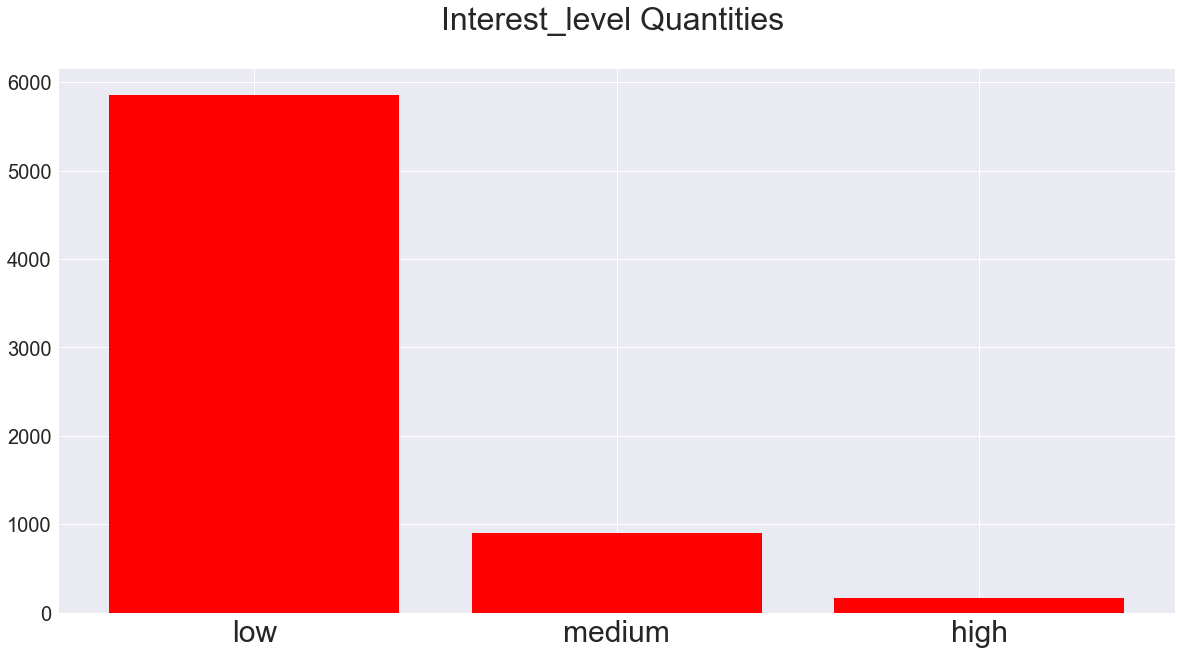

In [121]:
low = data[data['interest_level'] == 'low'][data.price>5000]
medium = data[data['interest_level'] == 'medium'][data.price>5000]
high = data[data['interest_level'] == 'high'][data.price>5000]
print(low.shape, medium.shape, high.shape)
interest_dist = np.array([low.shape[0], medium.shape[0], high.shape[0]])

plt.figure(figsize=(20,10))
plt.title("Interest_level Quantities \n", fontsize=32)

plt.yticks(fontsize=20)
plt.bar(range(3), [interest_dist[i] for i in range(3)], color="r", align="center")

plt.xticks(range(3),['low', 'medium', 'high'], rotation=0, fontsize=30, ha = 'center')

In [122]:
n_bed = 4
crds = data[['latitude', 'longitude']][data.listing_id<7200000].as_matrix()
y = data['interest_level']#[data['bedrooms']==n_bed]
crds.shape

(45074, 2)

<function matplotlib.pyplot.show>

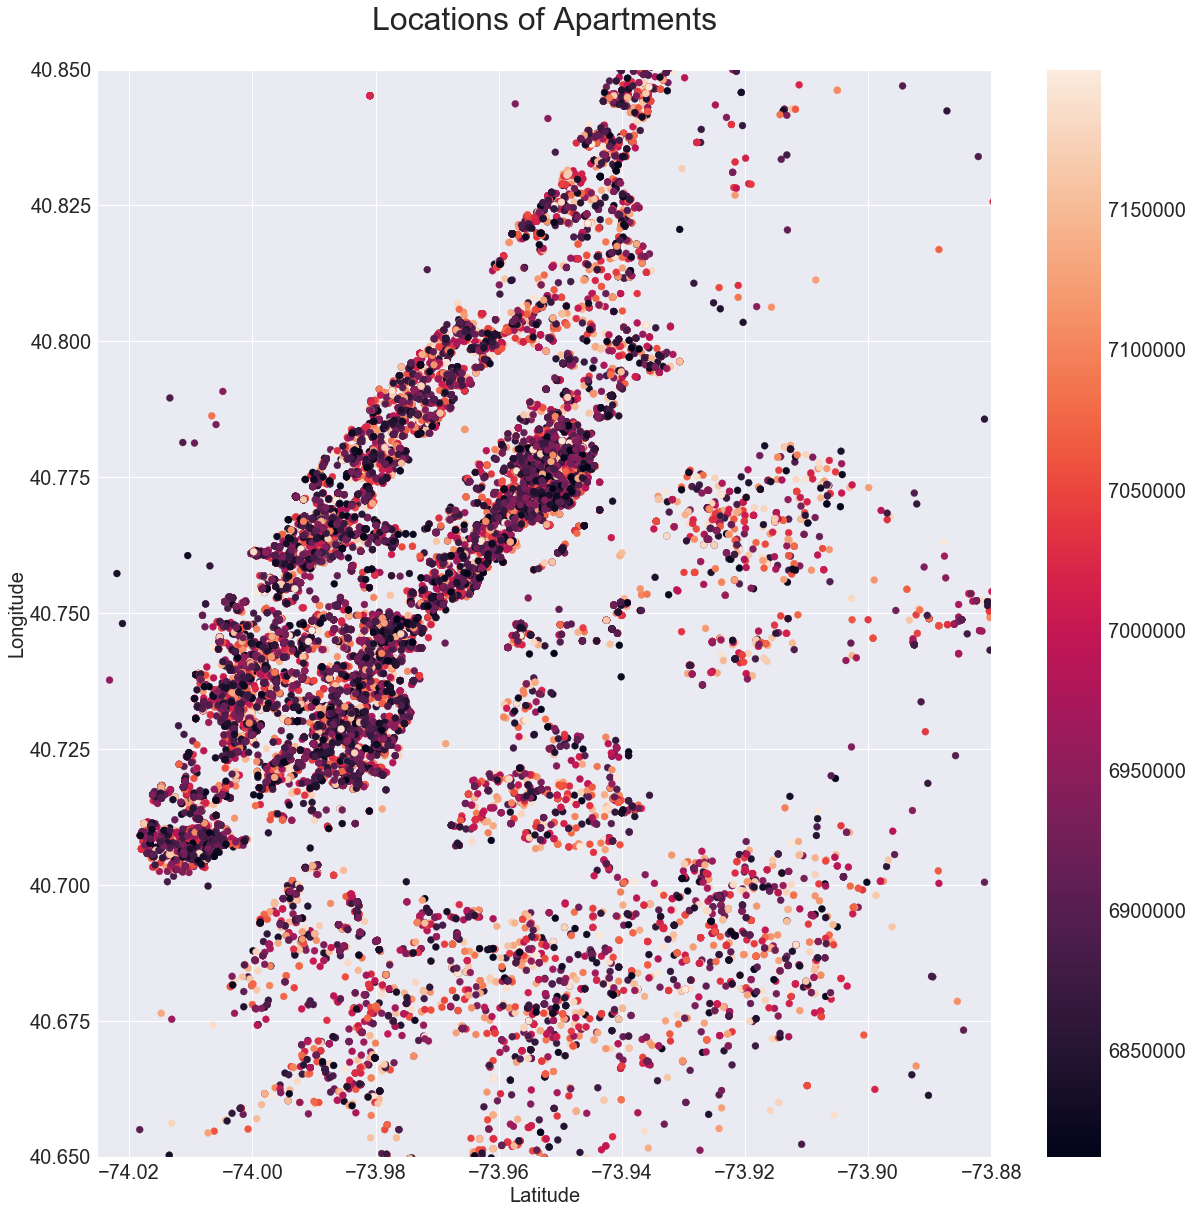

In [123]:
plt.figure(figsize=(20,20))
plt.title('Locations of Apartments\n', fontsize=32)
plt.xlabel('Latitude', fontsize=20)
plt.ylabel('Longitude', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
a = plt.scatter(crds[:, 1], crds[:, 0], c = data.listing_id[data.listing_id<7200000])
plt.colorbar()
#a = plt.plot(crds[blues, 1], crds[blues, 0], "bo", label='medium')
#a = plt.plot(crds[greens, 1], crds[greens, 0], "ro", label='high')
plt.xlim(-74.025,-73.88) 
plt.ylim(40.65,40.85)
plt.legend()
plt.show

<function matplotlib.pyplot.show>

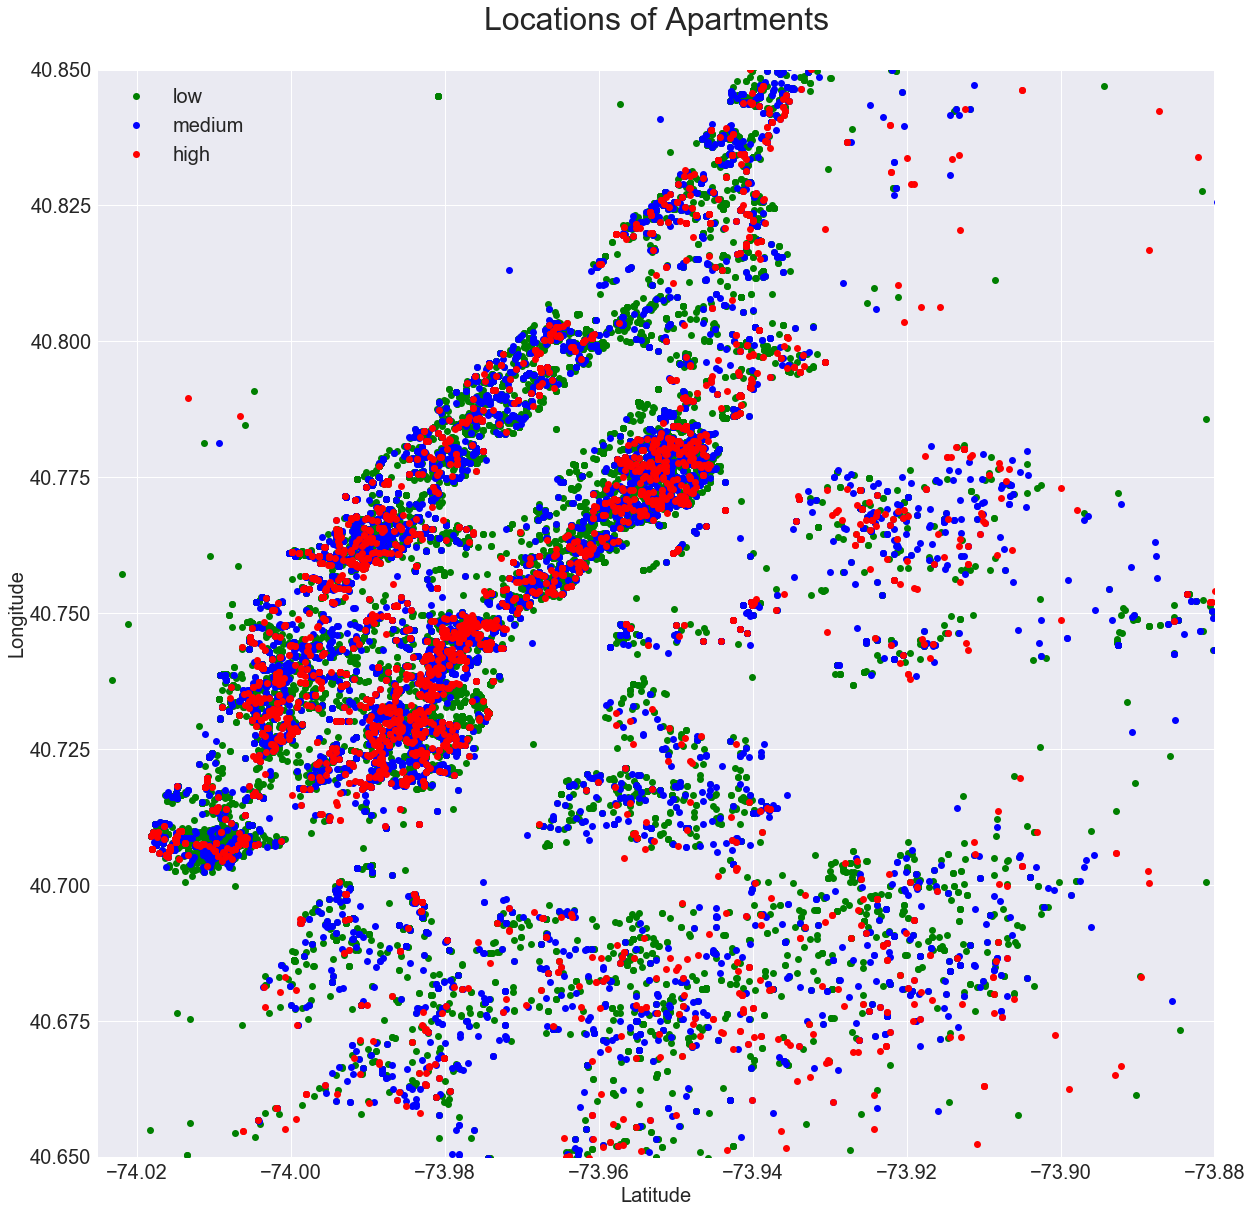

In [124]:
n_bed = 4
crds = data[['latitude', 'longitude']].as_matrix()
y = data['interest_level']#[data['bedrooms']==n_bed]

reds = y == 'low'
blues = y == 'medium'
greens = y == 'high'
plt.rcParams["figure.figsize"] = (20,20)


plt.title('Locations of Apartments\n', fontsize=32)
plt.xlabel('Latitude', fontsize=20)
plt.ylabel('Longitude', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
a = plt.plot(crds[reds, 1], crds[reds, 0], "go", label='low')
a = plt.plot(crds[blues, 1], crds[blues, 0], "bo", label='medium')
a = plt.plot(crds[greens, 1], crds[greens, 0], "ro", label='high')
plt.xlim(-74.025,-73.88) 
plt.ylim(40.65,40.85)
plt.legend()
plt.show

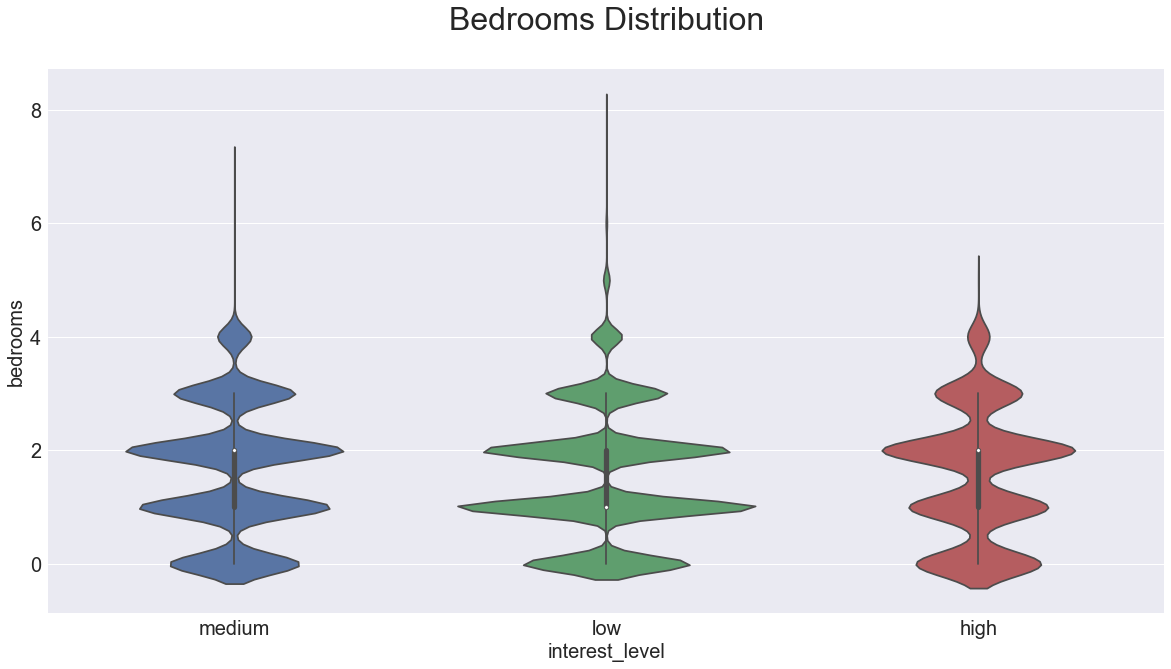

In [125]:
plt.figure(figsize=(20,10))
plt.title('Bedrooms Distribution\n', fontsize=32)
plt.xlabel('Interest Level', fontsize=20)
plt.ylabel('n_Bedrooms', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.violinplot(data = data, x ='interest_level', y = 'bedrooms')


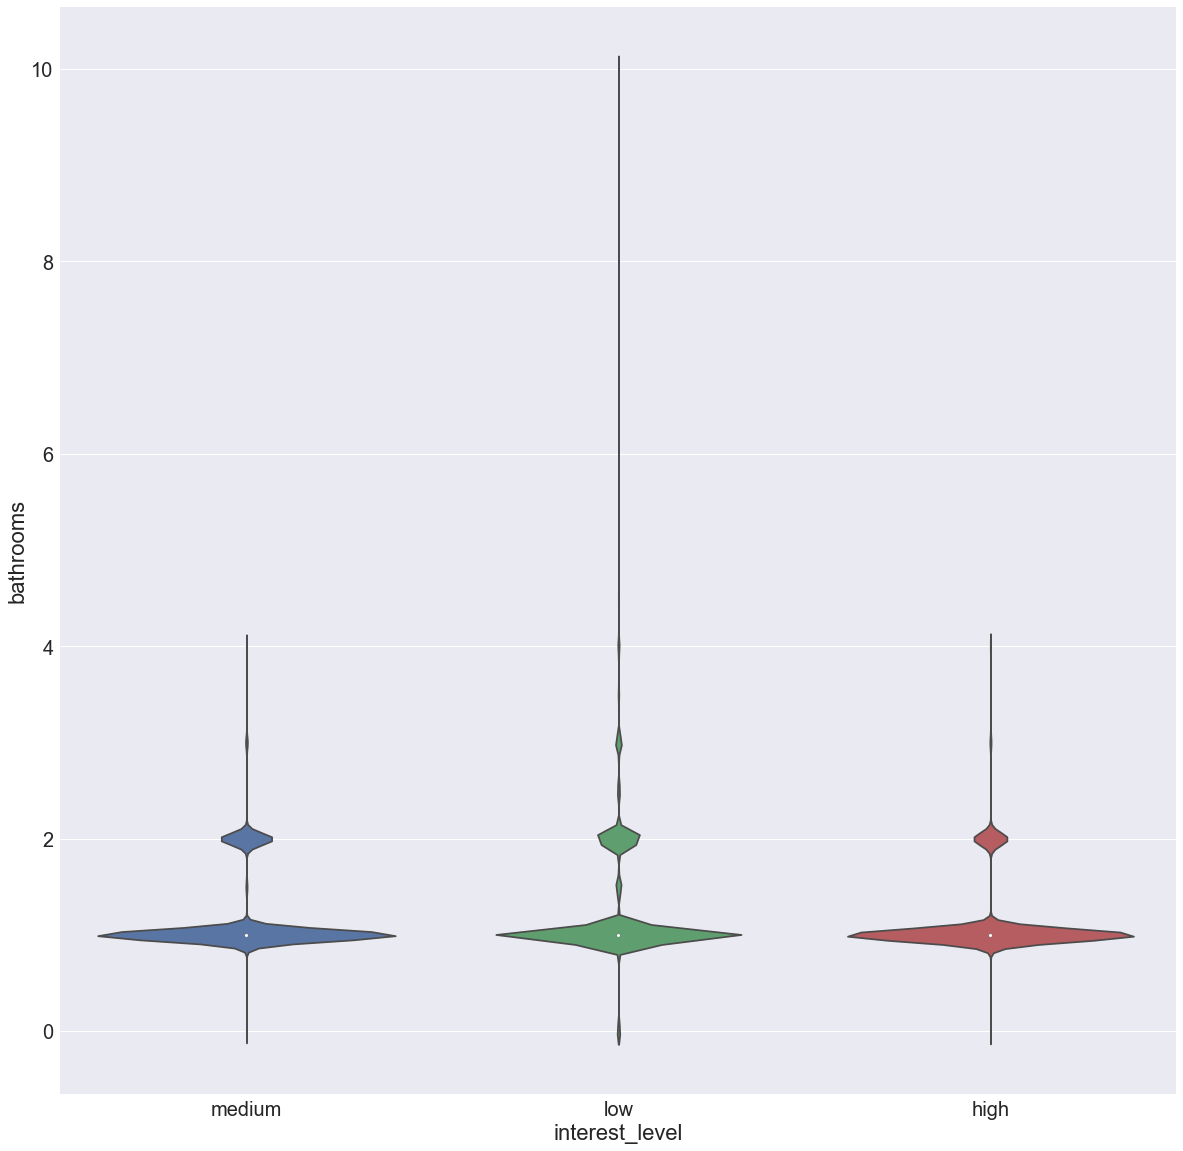

In [126]:
sns.violinplot(data = data, x ='interest_level', y = 'bathrooms')

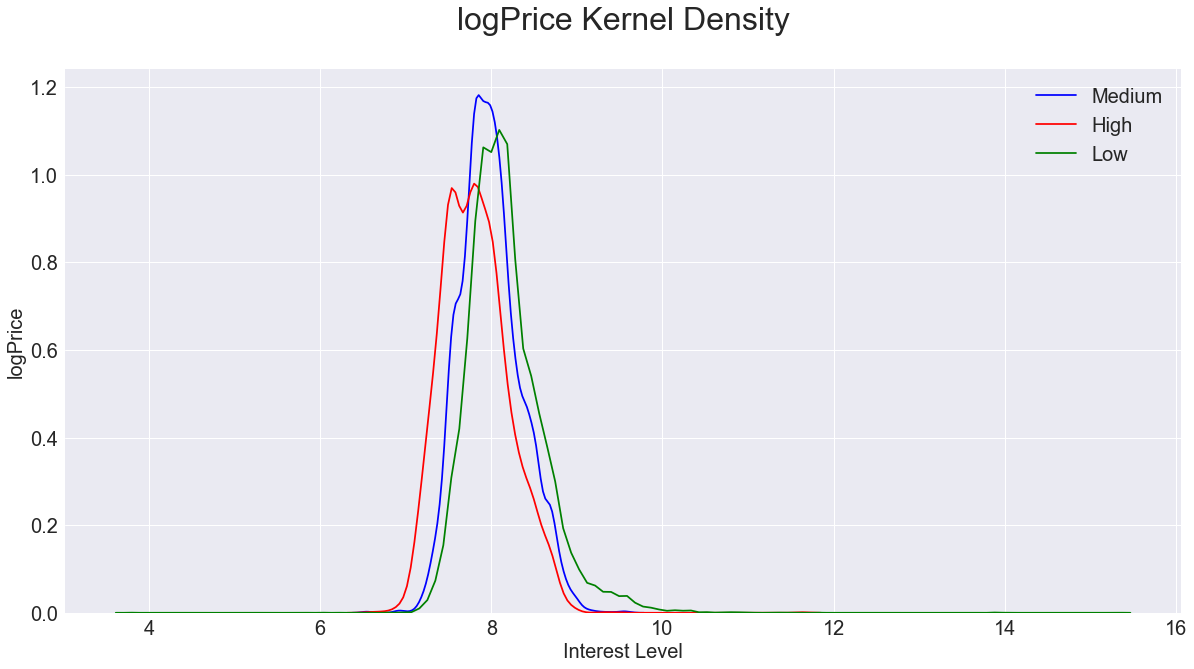

In [127]:
pr_l = np.log(data[data['interest_level'] == 'low']['price'])
pr_m = np.log(data[data['interest_level'] == 'medium']['price'])
pr_h = np.log(data[data['interest_level'] == 'high']['price'])

plt.figure(figsize=(20,10))
plt.title('logPrice Kernel Density\n', fontsize=32)
plt.xlabel('Interest Level', fontsize=20)
plt.ylabel('logPrice', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
sns.set(font_scale=2) 
sns.kdeplot(pr_m, color = 'blue', label = 'Medium')
sns.kdeplot(pr_h, color = 'red', label = 'High')
sns.kdeplot(pr_l, color = 'green', label = 'Low')

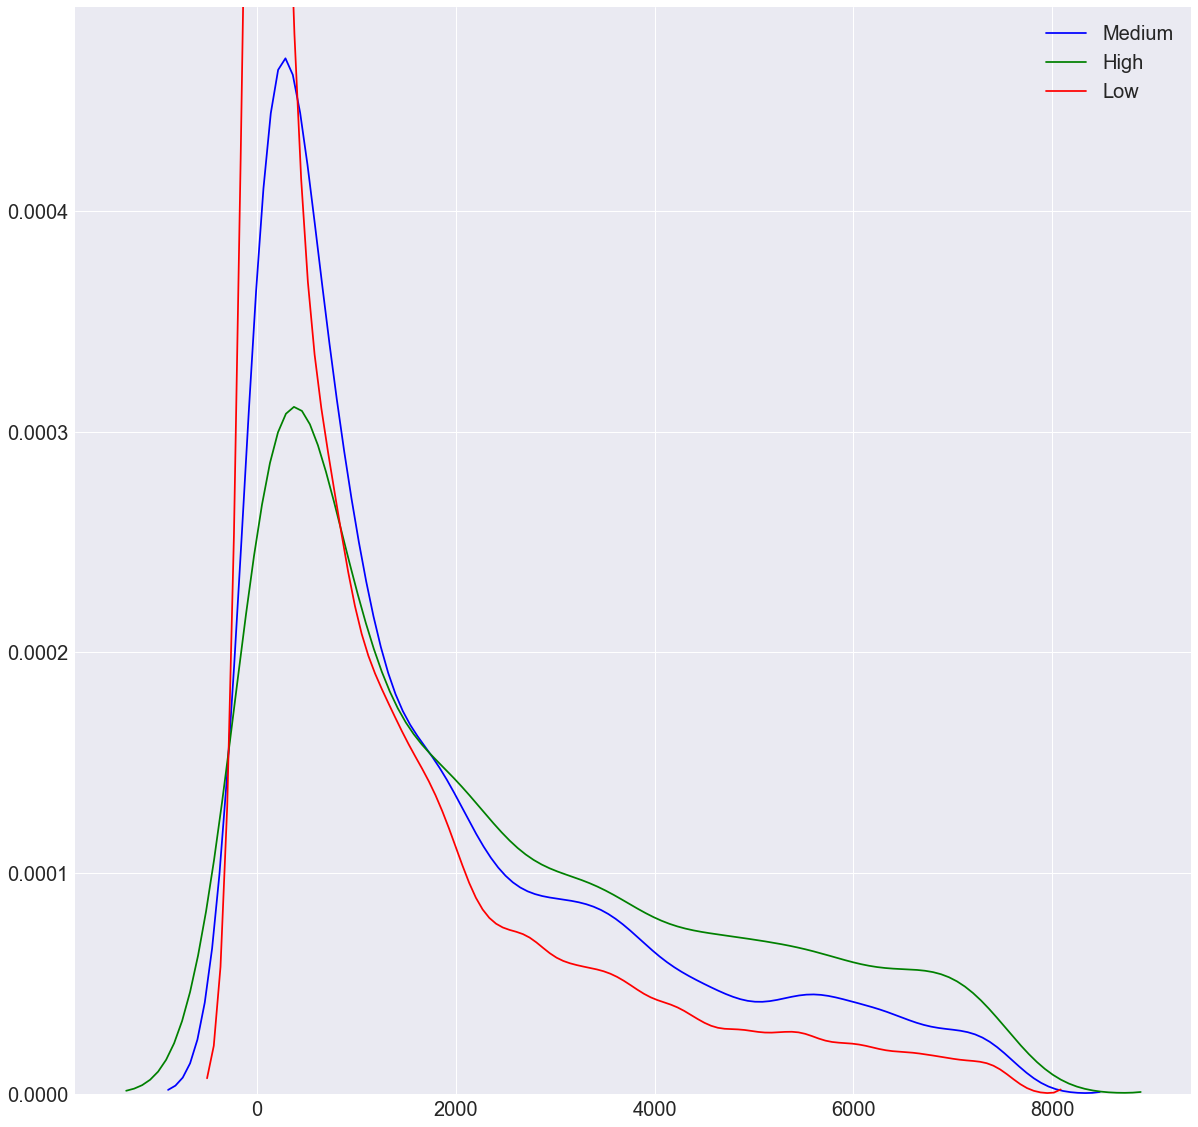

In [128]:
bi_l = data[data['interest_level'] == 'low']['building_id']
bi_m = data[data['interest_level'] == 'medium']['building_id']
bi_h = data[data['interest_level'] == 'high']['building_id']
plt.figure(figsize=(20, 20))
sns.kdeplot(bi_m, color = 'blue', label = 'Medium')
sns.kdeplot(bi_h, color = 'green', label = 'High')
sns.kdeplot(bi_l, color = 'red', label = 'Low')

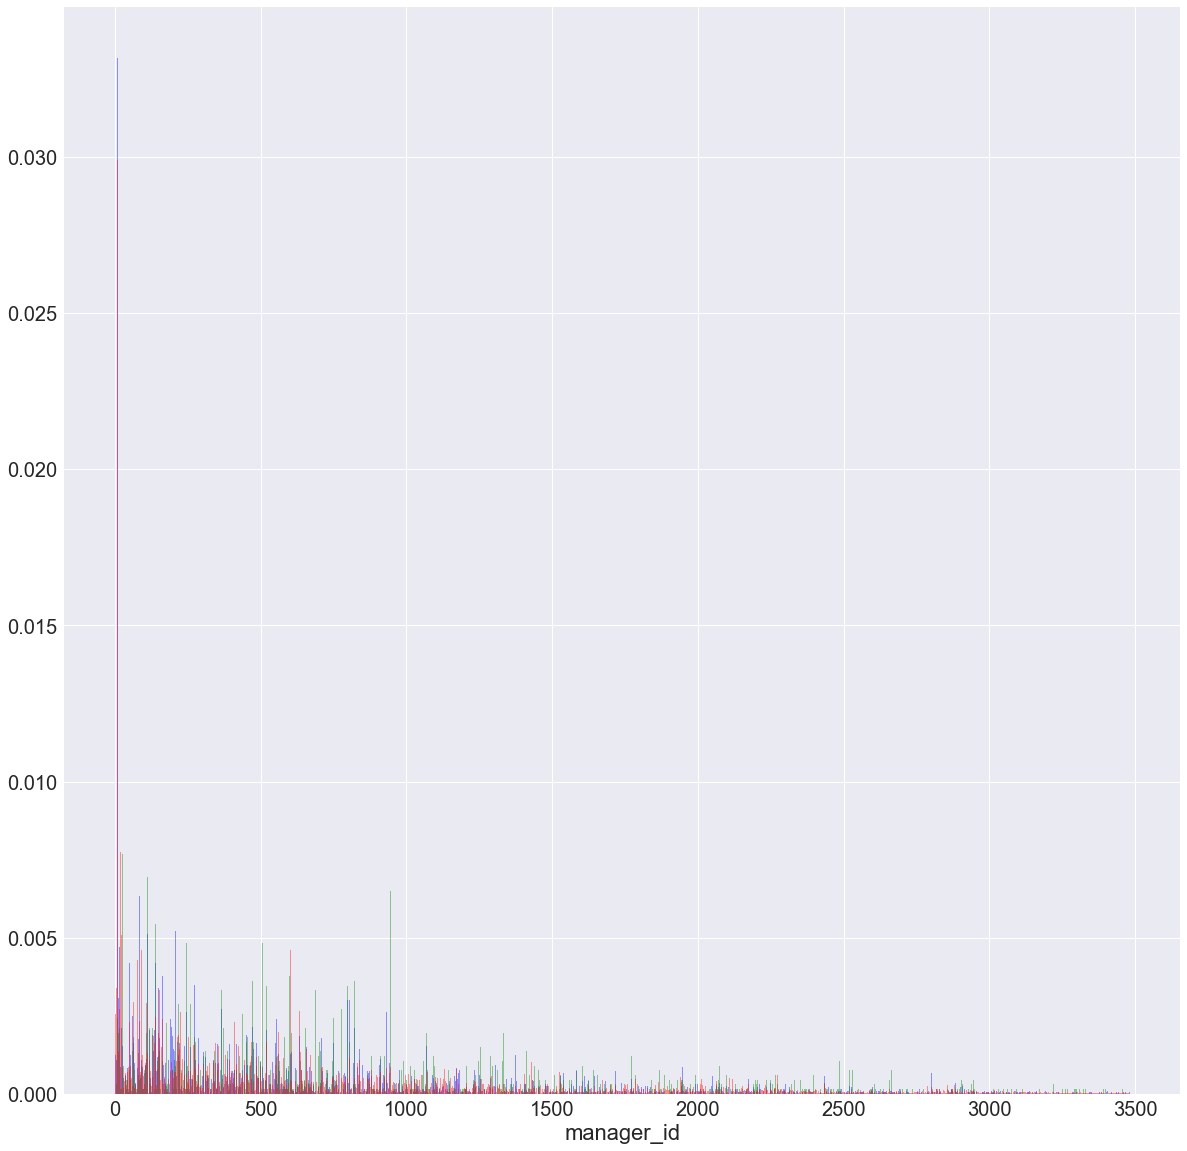

In [129]:
mi_l = data[data['interest_level'] == 'low']['manager_id']
mi_m = data[data['interest_level'] == 'medium']['manager_id']
mi_h = data[data['interest_level'] == 'high']['manager_id']
plt.figure(figsize=(20, 20))
sns.distplot(mi_m, color = 'blue', label = 'Medium', kde = False, bins = 2000, norm_hist = True)
sns.distplot(mi_h, color = 'green', label = 'High',kde = False, bins = 2000,norm_hist = True)
sns.distplot(mi_l, color = 'red', label = 'Low', kde = False, bins = 2000,norm_hist = True)

(-50, 200)

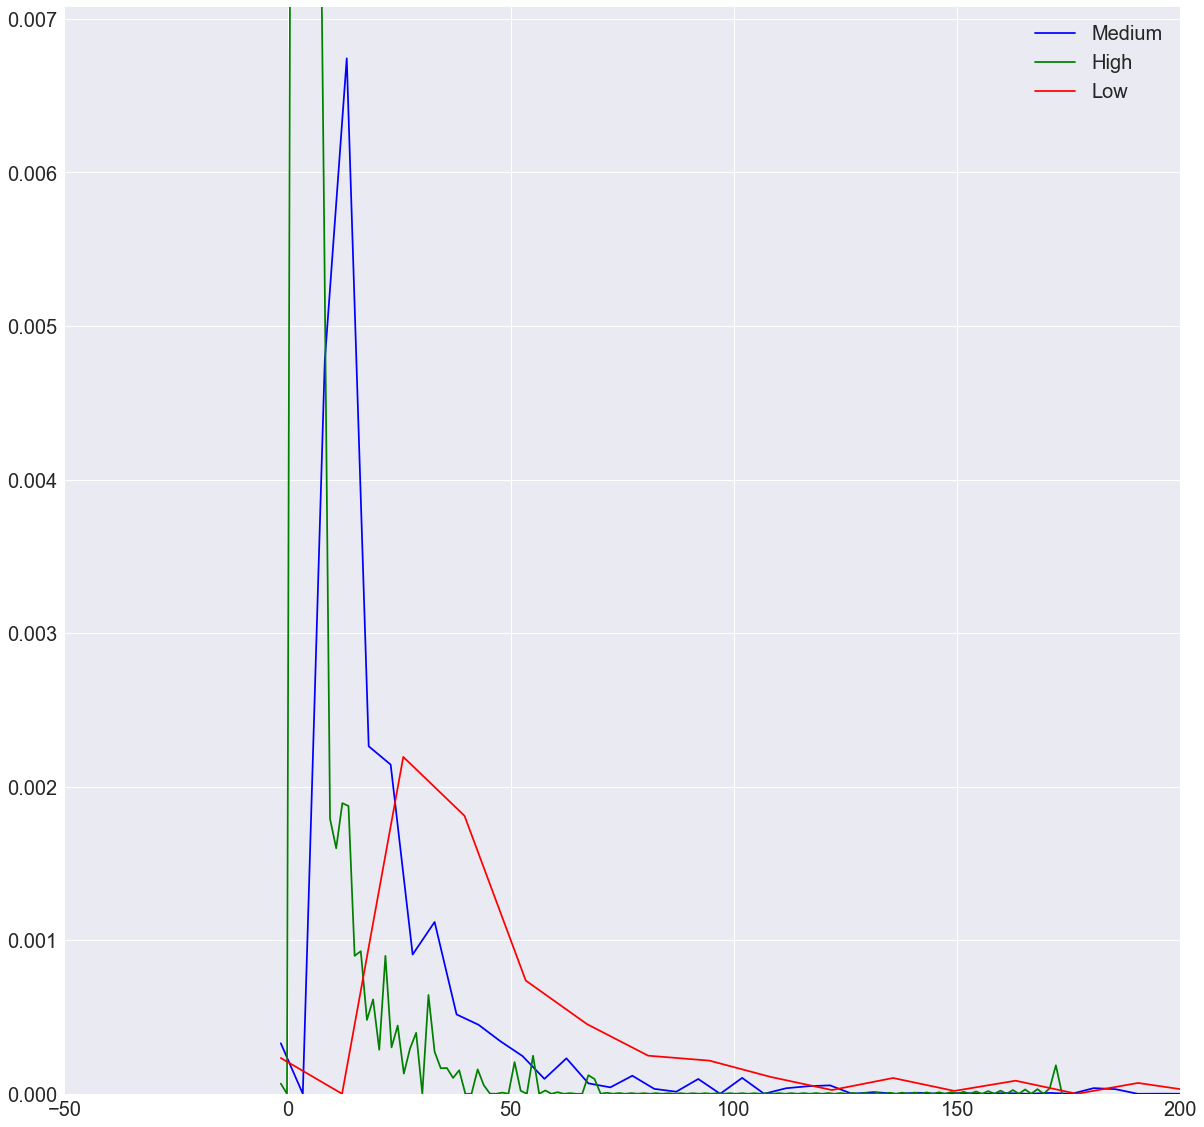

In [130]:

mi_l = data[data['interest_level'] == 'low'].groupby('manager_id')['manager_id'].count().sort_values(ascending=False)
mi_m = data[data['interest_level'] == 'medium'].groupby('manager_id')['manager_id'].count().sort_values(ascending=False)
mi_h = data[data['interest_level'] == 'high'].groupby('manager_id')['manager_id'].count().sort_values(ascending=False)
plt.figure(figsize=(20, 20))
sns.kdeplot(mi_m, color = 'blue', label = 'Medium', bw = .5)
sns.kdeplot(mi_h, color = 'green', label = 'High', bw = .5)
sns.kdeplot(mi_l, color = 'red', label = 'Low',  bw = .5)
plt.xlim(-50,200)

## Step 2. Feature engineering
#### Here we create features like manager skill and building popularity which are based on the occurrence of manager id and building id in the dataset. Also we convert photos into features - we derive resolution, number of photos, and information about the amount of furniture in the apartment.

In [131]:
# CONVERT MANAGER_ID INTO MANAGER SKILL

# Mangers count in low, medium, high
mgr_l = data[data['interest_level'] == 'low'].groupby('manager_id')['manager_id'].count().to_frame('mgr_cnt_l')
mgr_m = data[data['interest_level'] == 'medium'].groupby('manager_id')['manager_id'].count().to_frame('mgr_cnt_m')
mgr_h = data[data['interest_level'] == 'high'].groupby('manager_id')['manager_id'].count().to_frame('mgr_cnt_h')
mgr_t = data.groupby('manager_id')['manager_id'].count().to_frame('mgr_cnt_total')

# Saving all results in DataFrame
result = pd.merge(mgr_l, mgr_m, left_index=True, right_index=True, how='outer')
result = pd.merge(result, mgr_h, left_index=True, right_index=True, how='outer')
result = pd.merge(result, mgr_t, left_index=True, right_index=True, how='outer')
result = result.reset_index()
result['mgr_skill_h'] = result.mgr_cnt_h/result.mgr_cnt_total
result['mgr_skill_m'] = result.mgr_cnt_m/result.mgr_cnt_total
result['mgr_skill_l'] = result.mgr_cnt_l/result.mgr_cnt_total
result_mgr = result#.fillna(0)

result_mgr.head()

,manager_id,mgr_cnt_l,mgr_cnt_m,mgr_cnt_h,mgr_cnt_total,mgr_skill_h,mgr_skill_m,mgr_skill_l
0,1,67,23,0,90,0.000000,0.255556,0.744444
1,2,85,1,0,86,0.000000,0.011628,0.988372
2,3,77,49,8,134,0.059701,0.365672,0.574627
3,4,154,24,13,191,0.068063,0.125654,0.806283
4,5,15,0,0,15,0.000000,0.000000,1.000000


In [132]:
# CONVERT BUILDING_ID INTO BUILDING POPULARITY

# Building count in low, medium, high
building_l = data[data['interest_level'] == 'low'].groupby('building_id')['building_id'].count().to_frame('bld_cnt_l')
building_m = data[data['interest_level'] == 'medium'].groupby('building_id')['building_id'].count().to_frame('bld_cnt_m')
building_h = data[data['interest_level'] == 'high'].groupby('building_id')['building_id'].count().to_frame('bld_cnt_h')
building_t = data.groupby('building_id')['building_id'].count().to_frame('bld_cnt_total')

# Saving all results in DataFrame
result = pd.merge(building_l, building_m, left_index=True, right_index=True, how='outer')
result = pd.merge(result, building_h, left_index=True, right_index=True, how='outer')
result = pd.merge(result, building_t, left_index=True, right_index=True, how='outer')
result = result.reset_index()
result['bld_pop_h'] = result.bld_cnt_h/result.bld_cnt_total
result['bld_pop_m'] = result.bld_cnt_m/result.bld_cnt_total
result['bld_pop_l'] = result.bld_cnt_l/result.bld_cnt_total
result_bld = result#.fillna(0)
result_bld.head()

,building_id,bld_cnt_l,bld_cnt_m,bld_cnt_h,bld_cnt_total,bld_pop_h,bld_pop_m,bld_pop_l
0,1,2,1,0,3,0.000000,0.333333,0.666667
1,2,22,2,0,24,0.000000,0.083333,0.916667
2,3,22,26,10,58,0.172414,0.448276,0.379310
3,4,89,9,1,99,0.010101,0.090909,0.898990
4,5,7588,503,195,8286,0.023534,0.060705,0.915762


In [133]:
#COVERT FEATURES IN NUMBER OF FEATURES
result_wrd = data['features'].apply(len)
result_wrd = result_wrd.to_frame('feature_cnt')
result_wrd.head()

,feature_cnt
10,0
10000,5
100004,4
100007,2
100013,1


In [134]:
def photo_counter(appt_id):
    photo_cnt = np.array([])
    for indx, i in enumerate(appt_id):
        #print(indx)
        path = 'images\%s' % i
        #print(len(glob.glob(os.path.join(path,'*.jpg'))))
        photo_cnt = np.append(photo_cnt, len(glob.glob(os.path.join(path,'*.jpg'))))
    return photo_cnt

In [135]:
#FUNCTION FOR SIMPLE FEATURES FROM PHOTOS (COUNT, RESOLUTION, W, H)

def photo_simple_features(appt_id):
    photo_cnt = np.array([])
    photo_res = np.array([])
    photo_w = np.array([])
    photo_h = np.array([])
    for j, i in enumerate(appt_id):
        path = 'images\%s' % i
        #print(len(glob.glob(os.path.join(path,'*.jpg'))))
        photo_cnt = np.append(photo_cnt, len(glob.glob(os.path.join(path,'*.jpg'))))
        print(j)
        photo_res_temp = np.array([])
        photo_w_temp = np.array([])
        photo_h_temp = np.array([])
        for filename in glob.glob(os.path.join(path,'*.jpg')):
            img = cv2.imread(filename,0)
            photo_res_temp = np.append(photo_res_temp, img.shape[0]*img.shape[1])
            photo_w_temp = np.append(photo_w_temp, img.shape[0])
            photo_h_temp = np.append(photo_h_temp, img.shape[1])
        photo_res = np.append(photo_res, photo_res_temp.mean())
        photo_w = np.append(photo_w, photo_w_temp.mean())
        photo_h = np.append(photo_h, photo_w_temp.mean())  
    return photo_cnt, photo_res, photo_w, photo_h

In [136]:
#CREATING X, Y TRAIN

#Feature counts
feature_wrd_cnt = data['features'].apply(len).to_frame('feature_cnt')
bld_cnt_t = data.groupby('building_id')['building_id'].count().to_frame('bld_cnt_total').reset_index()
mgr_cnt_t = data.groupby('manager_id')['manager_id'].count().to_frame('mgr_cnt_total').reset_index()
description_wrd_cnt = data['description'].str.lower().str.split().apply(len).to_frame('ds_cnt')
created_replace = pd.to_datetime(data["created"]).dt.dayofyear.to_frame('time')

#Picture features
ph_data0 = pd.read_csv('photo(1-10000).csv')
ph_data0 = ph_data0.set_index('Unnamed: 0')
del ph_data0.index.name

ph_data1 = pd.read_csv('photo(10000-20000).csv')
ph_data1 = ph_data1.set_index('Unnamed: 0')
del ph_data1.index.name

ph_data2 = pd.read_csv('photo(20000-30000).csv')
ph_data2 = ph_data2.set_index('Unnamed: 0')
del ph_data2.index.name

ph_data3 = pd.read_csv('photo(30000-40000).csv')
ph_data3= ph_data3.set_index('Unnamed: 0')
del ph_data3.index.name

ph_data4 = pd.read_csv('photo(40000-50000).csv')
ph_data4 = ph_data4.set_index('Unnamed: 0')
del ph_data4.index.name

ph_data = pd.concat([ph_data0, ph_data1, ph_data2, ph_data3, ph_data4])
ph_data = ph_data.fillna(0)
ph_data.__delitem__('listing_id')

#preparation step
X_temp = data.reset_index()
X_temp = pd.merge(X_temp, result_bld[['building_id','bld_pop_h','bld_pop_m','bld_pop_l']], how='outer', right_index=False)
X_temp = pd.merge(X_temp, result_mgr[['manager_id','mgr_skill_h','mgr_skill_m','mgr_skill_l']], how='outer', right_index=False)
X_temp = pd.merge(X_temp, mgr_cnt_t[['manager_id','mgr_cnt_total']], how='outer', right_index=False) 
X_temp = pd.merge(X_temp, bld_cnt_t[['building_id','bld_cnt_total']], how='outer', right_index=False)
X_temp = X_temp.set_index('index').sort_index()
del X_temp.index.name
X_temp = pd.merge(X_temp, feature_wrd_cnt, left_index=True, right_index=True, how='outer')
X_temp = pd.merge(X_temp, description_wrd_cnt, left_index=True, right_index=True, how='outer')
X_temp = pd.merge(X_temp, created_replace, left_index=True, right_index=True, how='outer')
X_temp = pd.merge(X_temp, ph_data, left_index=True, right_index=True, how='outer')

#final step
X = X_temp[['listing_id','bathrooms', 'bedrooms', 'latitude', 'longitude', 'price', 'bld_cnt_total', 'bld_pop_h','bld_pop_m',
            'bld_pop_l', 'mgr_cnt_total', 'mgr_skill_h', 'mgr_skill_m', 'mgr_skill_l', 'feature_cnt', 'ds_cnt', 'time',
           'photo_cnt', 'photo_w', 'photo_h', 'photo_res', 'photo_thresh']]
X['photo_h'] = X['photo_res']/X['photo_w']
X = X.fillna(0)
#photo_cnt, photo_res, photo_w, photo_h =  photo_simple_features(X.listing_id)


#X['photo_cnt'] = photo_cnt
#X['photo_res'] = photo_res
#X['photo_w'] = photo_w
#X['photo_h'] = photo_h

y = data['interest_level'].sort_index()

X

/Users/peterkay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,listing_id,bathrooms,bedrooms,latitude,longitude,price,bld_cnt_total,bld_pop_h,bld_pop_m,bld_pop_l,...,mgr_skill_m,mgr_skill_l,feature_cnt,ds_cnt,time,photo_cnt,photo_w,photo_h,photo_res,photo_thresh
4,7170325,1.0,1,40.7108,-73.9539,2400,5,0.000000,0.600000,0.400000,...,0.419643,0.526786,7,75,168,12.0,640.000000,480.000000,307200.000000,12933.000000
6,7092344,1.0,2,40.7513,-73.9722,3800,51,0.058824,0.411765,0.529412,...,0.615385,0.346154,6,129,153,6.0,432.500000,640.000000,276800.000000,11410.166667
9,7158677,1.0,2,40.7575,-73.9625,3495,71,0.028169,0.352113,0.619718,...,0.204301,0.763441,6,117,166,6.0,640.000000,480.000000,307200.000000,14707.666667
10,7211212,1.5,3,40.7145,-73.9425,3000,3,0.000000,0.333333,0.666667,...,0.255556,0.744444,0,93,176,5.0,468.800000,581.569966,272640.000000,16844.200000
15,7225292,1.0,0,40.7439,-73.9743,2795,86,0.034884,0.186047,0.779070,...,0.145455,0.854545,4,39,180,4.0,431.500000,570.619930,246222.500000,39007.750000
16,7226687,1.0,3,40.7348,-73.9865,7200,110,0.109091,0.254545,0.636364,...,0.455621,0.331361,6,128,180,5.0,576.000000,565.111111,325504.000000,20270.400000
18,7126989,2.0,3,40.7302,-73.9826,6000,44,0.022727,0.386364,0.590909,...,0.395062,0.574074,5,69,160,7.0,409.142857,640.000000,261851.428571,12876.142857
19,7114138,1.0,0,40.7769,-73.9467,1945,20,0.100000,0.200000,0.700000,...,0.278689,0.581967,5,60,157,5.0,497.200000,594.685438,295677.600000,28832.200000
23,7131094,0.0,1,40.7346,-73.9811,2435,1,0.000000,0.000000,1.000000,...,0.277778,0.583333,1,52,161,4.0,493.000000,549.127789,270720.000000,12642.000000
32,7224815,3.0,3,40.6990,-73.9943,6850,2,0.000000,0.500000,0.500000,...,0.111111,0.888889,2,196,180,11.0,472.272727,467.526468,220800.000000,17200.454545


In [137]:
#MAKING X TEST

#Feature counting
result_wrd_test = data_test['features'].apply(len)
result_wrd_test = result_wrd_test.to_frame('feature_cnt')
test_bld_t = data_test.groupby('building_id')['building_id'].count().to_frame('bld_cnt_total').reset_index()
test_mgr_t = data_test.groupby('manager_id')['manager_id'].count().to_frame('mgr_cnt_total').reset_index()
test_ds_wrd_cnt = data_test['description'].str.lower().str.split().apply(len).to_frame('ds_cnt')
created_replace = pd.to_datetime(data_test["created"]).dt.dayofyear.to_frame('time')

ph_data0 = pd.read_csv('photo_test(0-10000).csv')
ph_data0 = ph_data0.set_index('Unnamed: 0')
del ph_data0.index.name

ph_data1 = pd.read_csv('photo_test(10000-20000).csv')
ph_data1 = ph_data1.set_index('Unnamed: 0')
del ph_data1.index.name

ph_data2 = pd.read_csv('photo_test(20000-30000).csv')
ph_data2 = ph_data2.set_index('Unnamed: 0')
del ph_data2.index.name

ph_data3 = pd.read_csv('photo_test(30000-40000).csv')
ph_data3= ph_data3.set_index('Unnamed: 0')
del ph_data3.index.name

ph_data4 = pd.read_csv('photo_test(40000-50000).csv')
ph_data4 = ph_data4.set_index('Unnamed: 0')
del ph_data4.index.name

ph_data5 = pd.read_csv('photo_test(50000-60000).csv')
ph_data5 = ph_data5.set_index('Unnamed: 0')
del ph_data5.index.name
ph_data6 = pd.read_csv('photo_test(60000-70000).csv')
ph_data6 = ph_data6.set_index('Unnamed: 0')
del ph_data6.index.name
ph_data7 = pd.read_csv('photo_test(70000-80000).csv')
ph_data7 = ph_data7.set_index('Unnamed: 0')
del ph_data7.index.name

ph_data = pd.concat([ph_data0, ph_data1, ph_data2, ph_data3, ph_data4])
ph_data = ph_data.fillna(0)
ph_data.__delitem__('listing_id')


#DataFrame preparation
X_temp = data_test.reset_index()
X_temp = pd.merge(X_temp, result_bld[['building_id','bld_pop_h','bld_pop_m','bld_pop_l']], how='outer', right_index=False)
X_temp = pd.merge(X_temp, result_mgr[['manager_id','mgr_skill_h','mgr_skill_m','mgr_skill_l']], how='outer', right_index=False)
X_temp = pd.merge(X_temp, test_mgr_t[['manager_id','mgr_cnt_total']], how='outer', right_index=False)
X_temp = pd.merge(X_temp, test_bld_t[['building_id','bld_cnt_total']], how='outer', right_index=False)
X_temp = X_temp[~X_temp['index'].isnull()]
X_temp['index'] = X_temp['index'].astype(int)
X_temp['listing_id'] = X_temp['listing_id'].astype(int)
X_temp = X_temp.fillna(0)
X_temp = X_temp.set_index('index').sort_index()
del X_temp.index.name
X_temp = pd.merge(X_temp, result_wrd_test, left_index=True, right_index=True, how='outer')
X_temp = pd.merge(X_temp, test_ds_wrd_cnt, left_index=True, right_index=True, how='outer')
X_temp = pd.merge(X_temp, ph_data, left_index=True, right_index=True, how='outer')
X_temp = pd.merge(X_temp, created_replace, left_index=True, right_index=True, how='outer')
#Extracting meaningful data
X_test = X_temp[['listing_id','bathrooms', 'bedrooms', 'latitude', 'longitude', 'price', 'bld_cnt_total', 'bld_pop_h','bld_pop_m',
            'bld_pop_l', 'mgr_cnt_total', 'mgr_skill_h', 'mgr_skill_m', 'mgr_skill_l', 'feature_cnt', 'ds_cnt', 'time',
           'photo_cnt', 'photo_w', 'photo_h', 'photo_res', 'photo_thresh']]

X_test['photo_h'] = X_test['photo_res']/X_test['photo_w']
#X_test = X_temp[['listing_id','bathrooms', 'bedrooms', 'latitude', 'longitude', 'price', 'bld_cnt_total', 'feature_cnt', 'ds_cnt', 'time', 
#               'photo_cnt', 'photo_w', 'photo_h', 'photo_thresh']]
X_test = X_test.fillna(0)
X_test.sort_index()

/Users/peterkay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,listing_id,bathrooms,bedrooms,latitude,longitude,price,bld_cnt_total,bld_pop_h,bld_pop_m,bld_pop_l,...,mgr_skill_m,mgr_skill_l,feature_cnt,ds_cnt,time,photo_cnt,photo_w,photo_h,photo_res,photo_thresh
0,7142618,1.0,1.0,40.7185,-73.9865,2950.0,5.0,0.0,0.0,0.0,...,0.0,0.0,6,76,163,8.0,425.000000,640.000000,272000.000000,23279.125000
1,7210040,1.0,2.0,40.7278,-74.0000,2850.0,12378.0,0.0,0.0,0.0,...,0.0,0.0,3,34,176,3.0,555.333333,578.535414,321280.000000,30754.666667
2,7174566,1.0,0.0,40.7260,-74.0026,2295.0,12378.0,0.0,0.0,0.0,...,0.0,0.0,3,38,169,1.0,426.000000,640.000000,272640.000000,13707.000000
3,7191391,1.0,2.0,40.7321,-74.0028,2900.0,10.0,0.0,0.0,0.0,...,0.0,0.0,3,20,173,4.0,430.000000,580.465116,249600.000000,30867.750000
5,7171695,1.0,1.0,40.7054,-74.0095,3254.0,94.0,0.0,0.0,0.0,...,0.0,0.0,10,83,168,6.0,471.666667,558.833922,263583.333333,24130.000000
7,7225206,2.0,2.0,40.7610,-73.9983,4990.0,151.0,0.0,0.0,0.0,...,0.0,0.0,12,132,180,8.0,440.875000,612.599943,270080.000000,27113.375000
8,7200075,3.5,4.0,40.7358,-73.9877,20000.0,2.0,0.0,0.0,0.0,...,0.0,0.0,3,0,174,15.0,440.000000,619.345455,272512.000000,22591.133333
11,7145074,1.0,0.0,40.7814,-73.9507,2150.0,17.0,0.0,0.0,0.0,...,0.0,0.0,5,88,164,3.0,292.000000,440.000000,128480.000000,14858.333333
12,7193645,2.0,4.0,40.7216,-73.9927,6500.0,29.0,0.0,0.0,0.0,...,0.0,0.0,1,0,173,7.0,480.000000,596.000000,286080.000000,26234.142857
13,7147703,1.0,1.0,40.7553,-73.9953,3365.0,46.0,0.0,0.0,0.0,...,0.0,0.0,3,0,164,18.0,406.000000,601.000000,244006.000000,33250.833333


## Step 3. Visualization of additional parameters
#### Here we visualize such parameters as words in apartment's description, number of items in apartments (photo_thresh parameter), day of the year when listing was posted and manager skill.

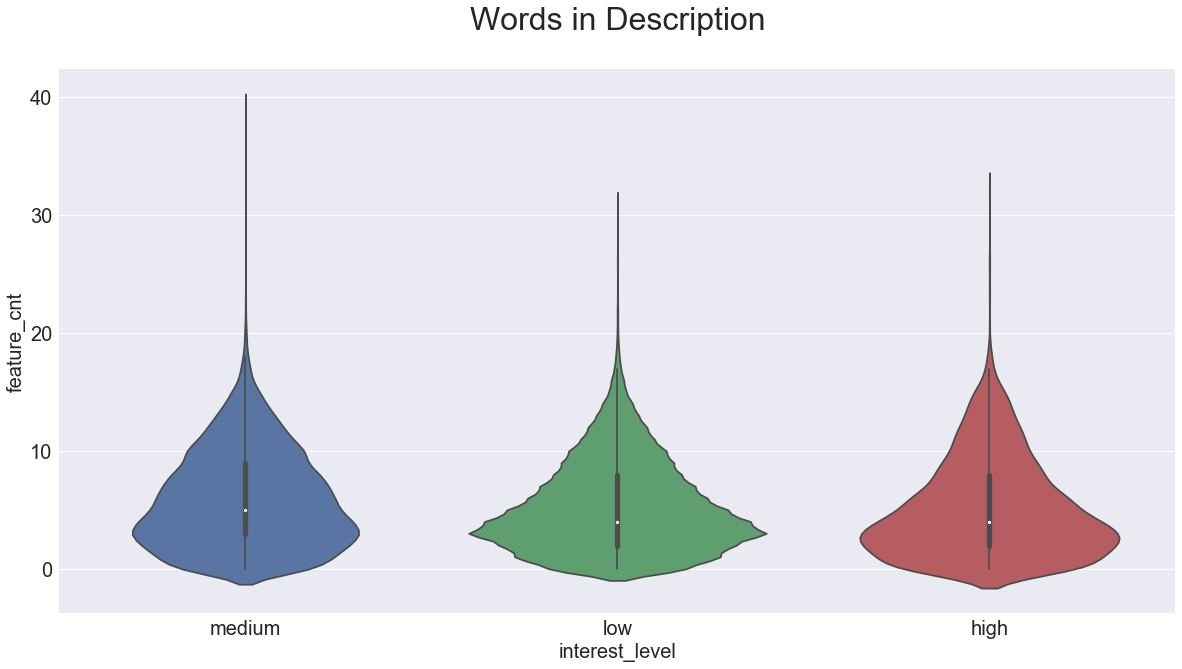

In [138]:
plt.figure(figsize=(20,10))
plt.title('Words in Description\n', fontsize=32)
plt.xlabel('Interest Level', fontsize=20)
plt.ylabel('n_Bedrooms', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.violinplot( x =y, y = X['feature_cnt'])

In [139]:
X[X['longitude']>-73.9] = X['longitude'].mean()
X[X['longitude']<-74.05] = X['longitude'].mean()
X[X['latitude']>42] = X['latitude'].mean()
X[X['latitude']<39] = X['latitude'].mean()

In [140]:
X[X['latitude']<40]=X['latitude'].mean()

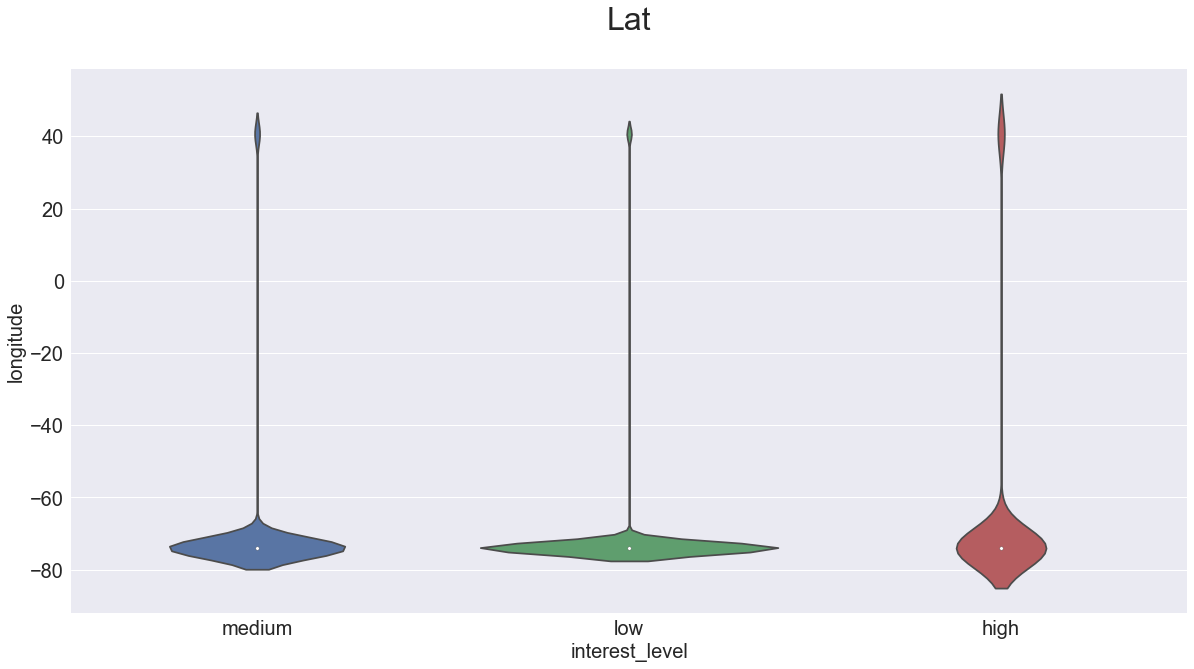

In [141]:
plt.figure(figsize=(20,10))
plt.title('Lat\n', fontsize=32)
plt.xlabel('Interest Level', fontsize=20)
plt.ylabel('n_Bedrooms', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.violinplot( x =y, y = X['longitude'])

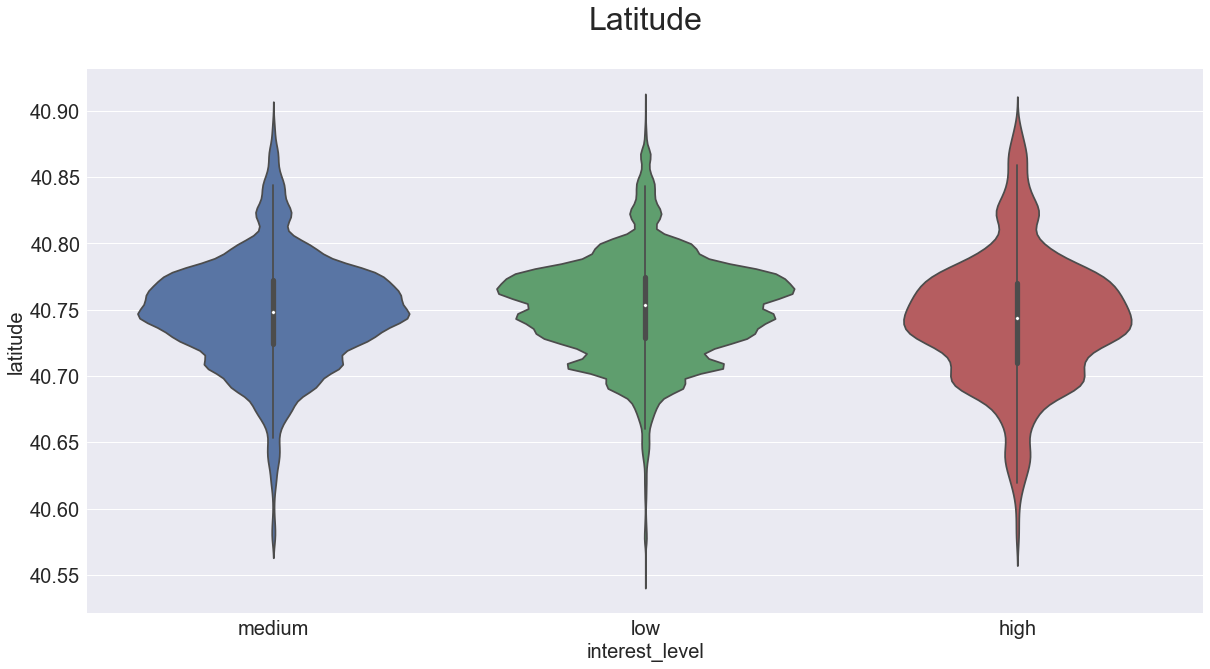

In [142]:
plt.figure(figsize=(20,10))
plt.title('Latitude\n', fontsize=32)
plt.xlabel('Interest Level', fontsize=20)
plt.ylabel('latitude', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.violinplot( x =y, y = X['latitude'])

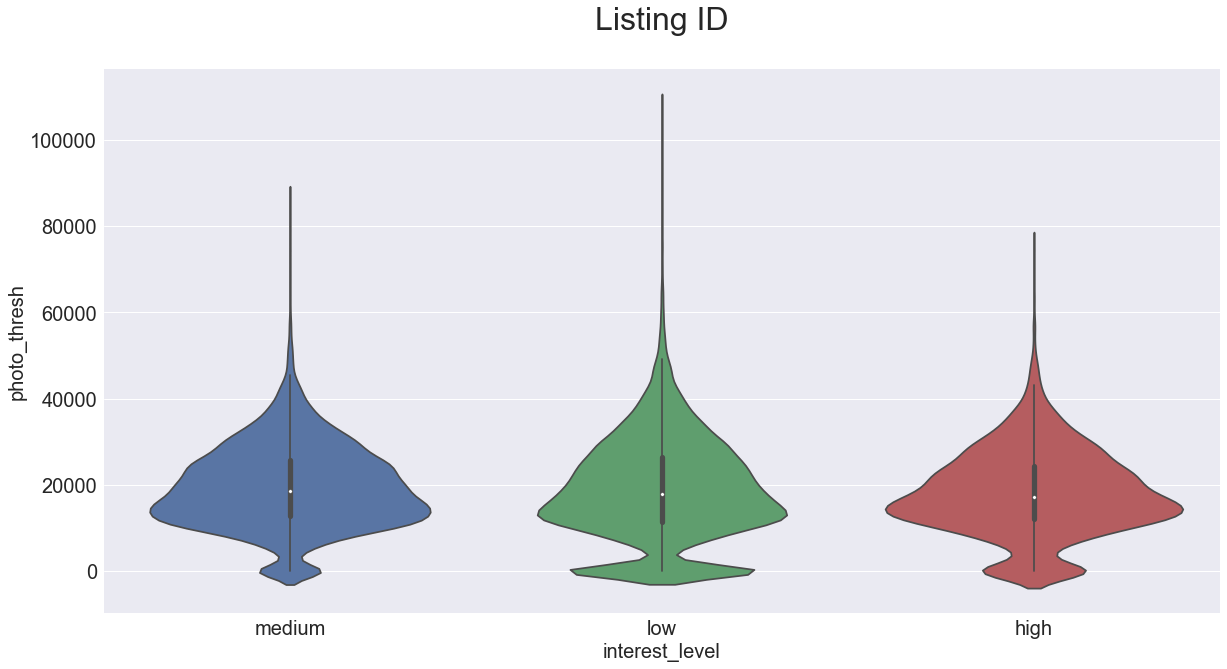

In [143]:
plt.figure(figsize=(20,10))
plt.title('Listing ID\n', fontsize=32)
plt.xlabel('Interest Level', fontsize=20)
plt.ylabel('latitude', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.violinplot( x =y, y = X['photo_thresh'])

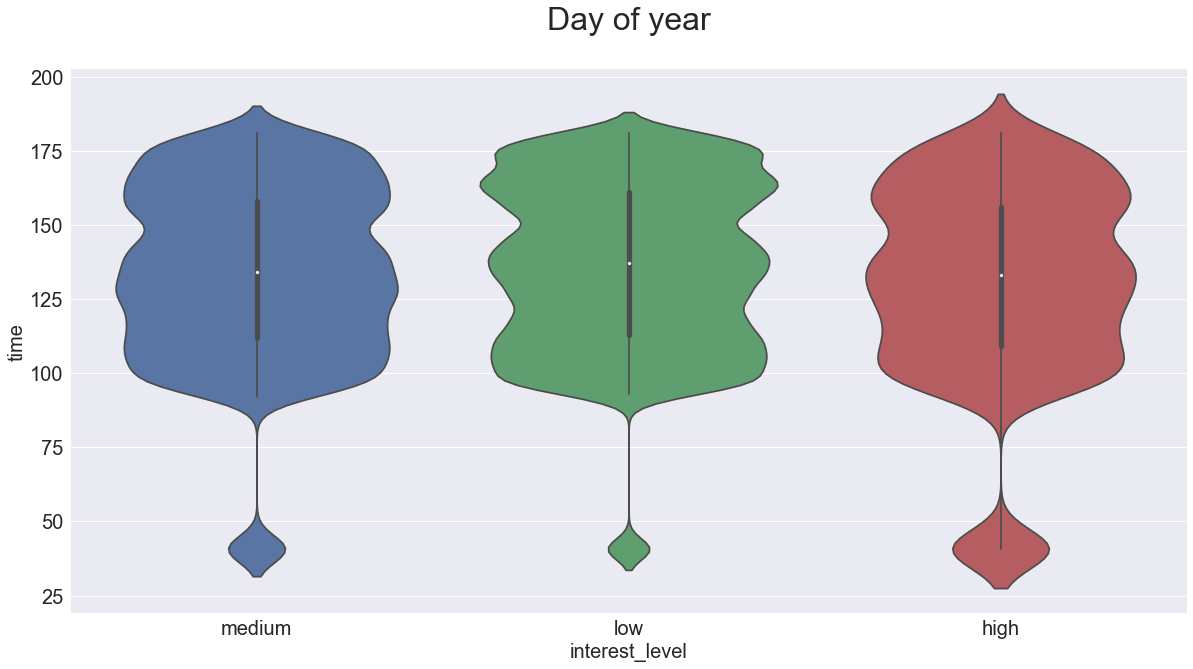

In [144]:
plt.figure(figsize=(20,10))
plt.title('Day of year\n', fontsize=32)
plt.xlabel('Interest Level', fontsize=20)
plt.ylabel('latitude', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.violinplot( x =y, y = X['time'])

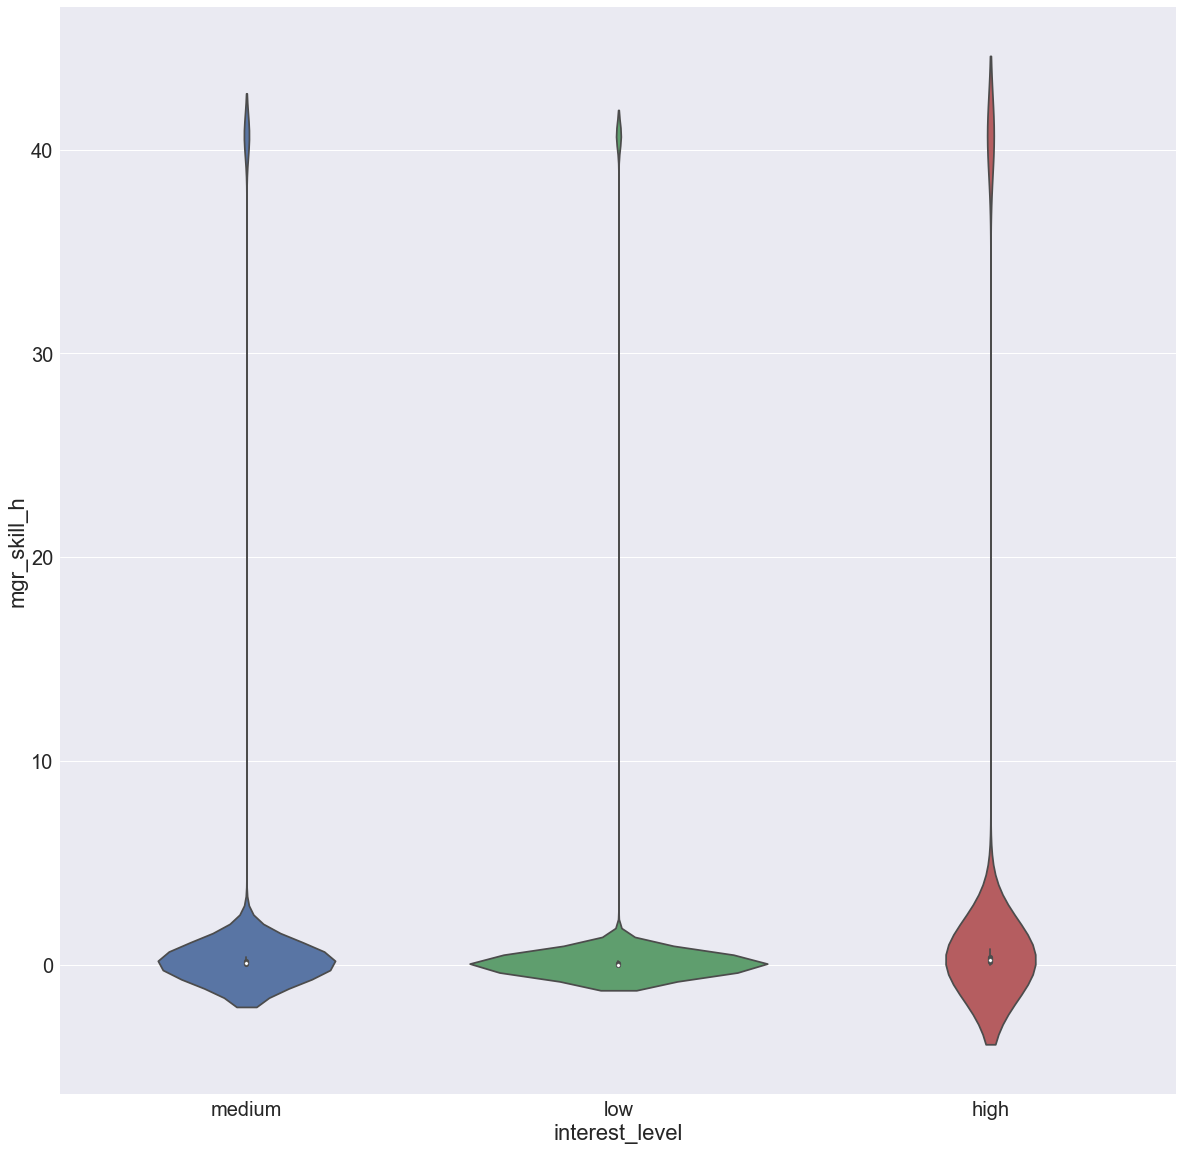

In [145]:
sns.violinplot( x =y, y = X['mgr_skill_h'])

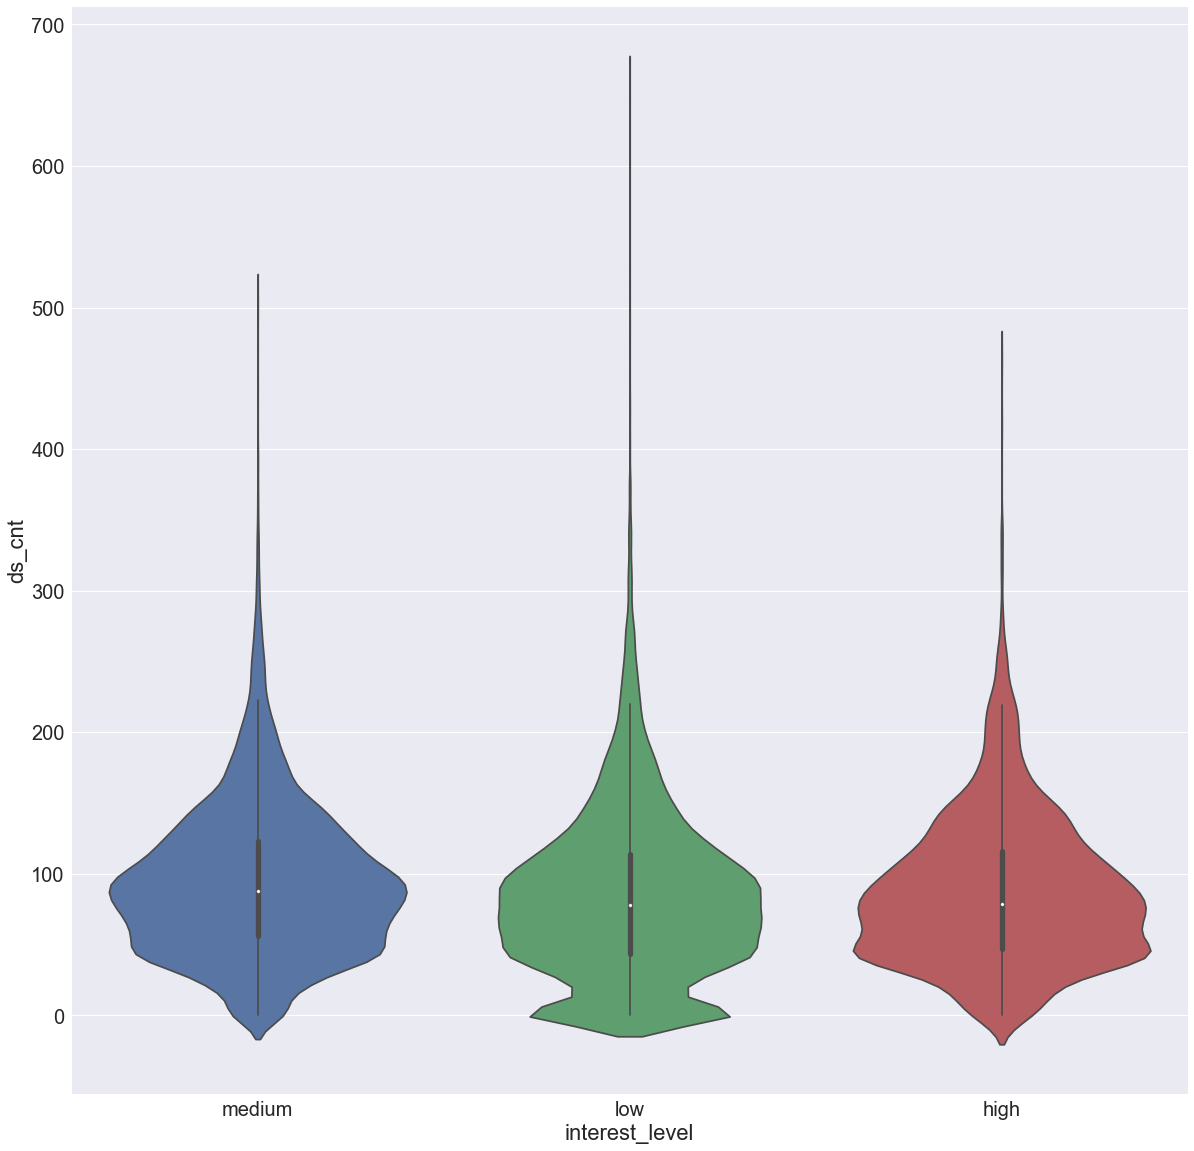

In [146]:
sns.violinplot( x =y, y = X['ds_cnt'])

## Step 4. Calculation of feature importance
#### Try to understand what features have the most influence on target variable

In [147]:
X_d = X.drop(['bld_pop_h','bld_pop_m','bld_pop_l', 'mgr_skill_h', 'mgr_skill_m', 'mgr_skill_l', 'photo_res', 'photo_w', 'photo_h', 'photo_thresh'], axis = 1)
X_test_d = X_test.drop(['bld_pop_h','bld_pop_m','bld_pop_l', 'mgr_skill_h', 'mgr_skill_m', 'mgr_skill_l', 'photo_res', 'photo_w', 'photo_h', 'photo_thresh'],axis=1)
# X_d['hour'] =  pd.to_datetime(data.sort_index().created).dt.hour
# X_d['hours_t'] = X_d.time*24+X_d.hour
# X_d['dol_r'] = (X_d.bedrooms+X_d.bathrooms)/X_d.price
# X_d['dol_d'] = X_d.hours_t/X_d.price
X_train, X_val, y_train, y_val = train_test_split(X_d, y, test_size=0.33,random_state = 0)
X_d

,listing_id,bathrooms,bedrooms,latitude,longitude,price,bld_cnt_total,mgr_cnt_total,feature_cnt,ds_cnt,time,photo_cnt
4,7.170325e+06,1.00000,1.00000,40.71080,-73.95390,2400.00000,5.00000,112.00000,7.00000,75.00000,168.00000,12.00000
6,7.092344e+06,1.00000,2.00000,40.75130,-73.97220,3800.00000,51.00000,26.00000,6.00000,129.00000,153.00000,6.00000
9,7.158677e+06,1.00000,2.00000,40.75750,-73.96250,3495.00000,71.00000,93.00000,6.00000,117.00000,166.00000,6.00000
10,7.211212e+06,1.50000,3.00000,40.71450,-73.94250,3000.00000,3.00000,90.00000,0.00000,93.00000,176.00000,5.00000
15,7.225292e+06,1.00000,0.00000,40.74390,-73.97430,2795.00000,86.00000,55.00000,4.00000,39.00000,180.00000,4.00000
16,7.226687e+06,1.00000,3.00000,40.73480,-73.98650,7200.00000,110.00000,169.00000,6.00000,128.00000,180.00000,5.00000
18,7.126989e+06,2.00000,3.00000,40.73020,-73.98260,6000.00000,44.00000,162.00000,5.00000,69.00000,160.00000,7.00000
19,7.114138e+06,1.00000,0.00000,40.77690,-73.94670,1945.00000,20.00000,122.00000,5.00000,60.00000,157.00000,5.00000
23,7.131094e+06,0.00000,1.00000,40.73460,-73.98110,2435.00000,1.00000,36.00000,1.00000,52.00000,161.00000,4.00000
32,7.224815e+06,3.00000,3.00000,40.69900,-73.99430,6850.00000,2.00000,36.00000,2.00000,196.00000,180.00000,11.00000


Feature ranking:
1. feature 5 - price (0.130898)
2. feature 6 - bld_cnt_total (0.108432)
3. feature 0 - listing_id (0.096943)
4. feature 9 - ds_cnt (0.091907)
5. feature 3 - latitude (0.090582)
6. feature 10 - time (0.088087)
7. feature 4 - longitude (0.088040)
8. feature 7 - mgr_cnt_total (0.086792)
9. feature 11 - photo_cnt (0.078292)
10. feature 8 - feature_cnt (0.077575)
11. feature 2 - bedrooms (0.042469)
12. feature 1 - bathrooms (0.019984)


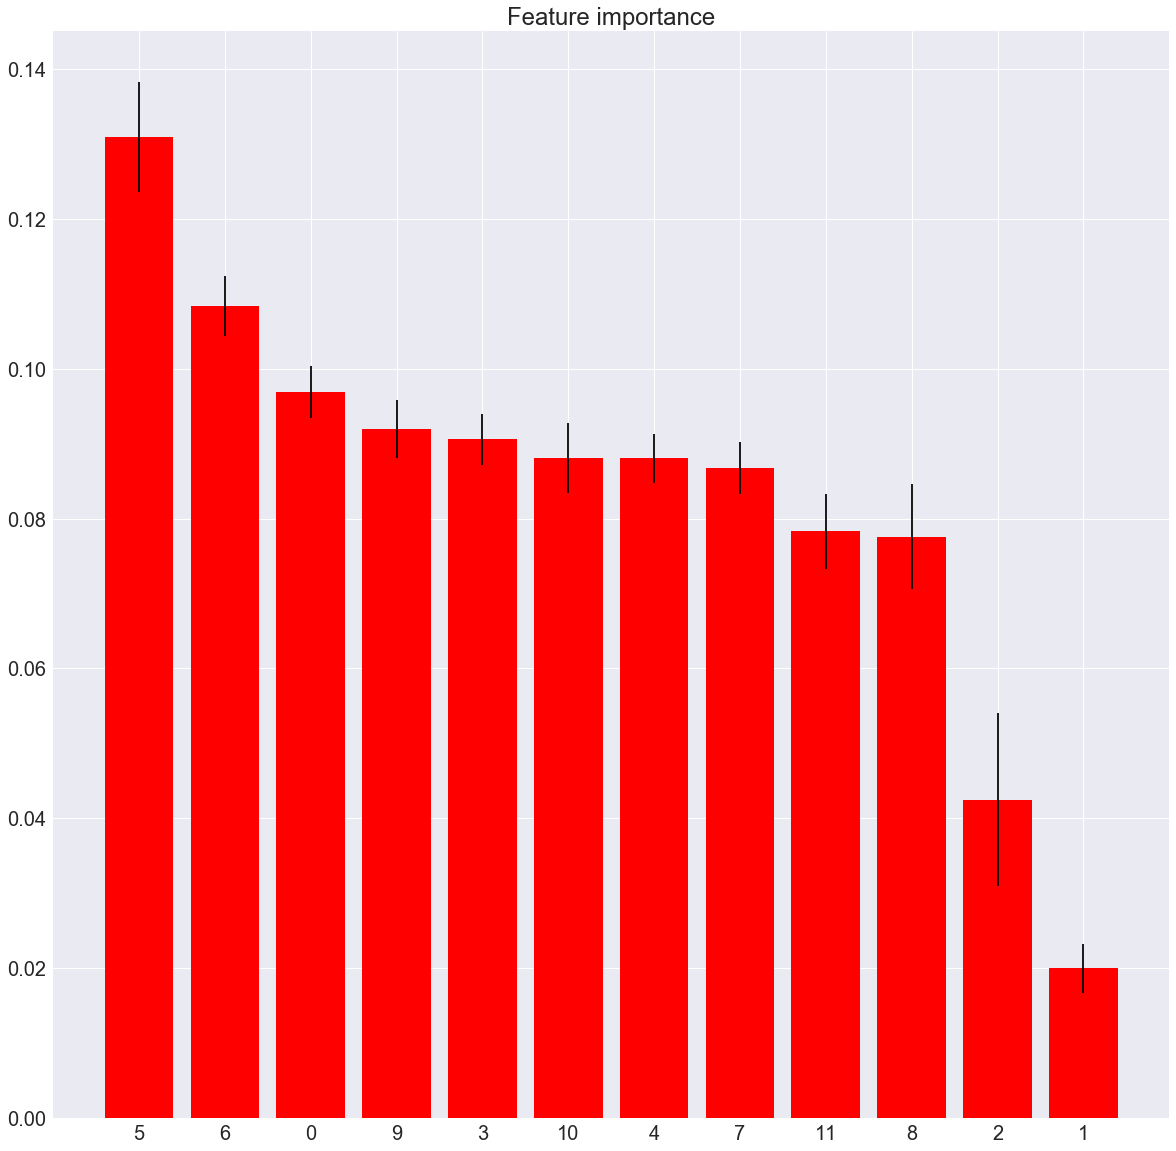

In [148]:
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)

forest.fit(X_d, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")


for f in range(X_d.shape[1]):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], X_d.columns.values[indices[f]], importances[indices[f]]))

# Plot the feature importance of the forest
plt.figure()
plt.title("Feature importance")
plt.bar(range(X_d.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_d.shape[1]), indices)
plt.xlim([-1, X_d.shape[1]])
plt.show()

## Step 5. Saving prepared dataset

In [149]:
y.sort_index().head()

4     medium
6        low
9     medium
10    medium
15       low
Name: interest_level, dtype: object

In [150]:
#MAKE SLICED LISTING iD

X.listing_id[0:10000].to_csv('listing_id(1-10000).csv')
X.listing_id[10000:20000].to_csv('listing_id(10000-20000).csv')
X.listing_id[20000:30000].to_csv('listing_id(20000-30000).csv')
X.listing_id[30000:40000].to_csv('listing_id(30000-40000).csv')
X.listing_id[40000:].to_csv('listing_id(40000-50000).csv')

In [151]:
#MAKE SLICED LISTING iD IN X_test

X_test.listing_id[0:10000].to_csv('listing_id_test(1-10000).csv')
X_test.listing_id[10000:20000].to_csv('listing_id_test(10000-20000).csv')
X_test.listing_id[20000:30000].to_csv('listing_id_test(20000-30000).csv')
X_test.listing_id[30000:40000].to_csv('listing_id_test(30000-40000).csv')
X_test.listing_id[40000:50000].to_csv('listing_id_test(40000-50000).csv')
X_test.listing_id[50000:60000].to_csv('listing_id_test(50000-60000).csv')
X_test.listing_id[60000:70000].to_csv('listing_id_test(60000-70000).csv')
X_test.listing_id[70000:].to_csv('listing_id_test(70000-80000).csv')

In [152]:
#X.listing_id.to_csv('listing_id.csv')
len(X_test.listing_id)
#b = np.genfromtxt('listing_id.csv', delimiter=',')
#c = pd.DataFrame({'listing_id': b[:,1]} , index = b[:,0].astype(int))
#c

74659

## Step 6. Apply Random Forest Classifier and visualize feature importance

In [153]:
clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)
clf.fit(X_train, y_train)
y_val_pred = clf.predict_proba(X_val)
log_loss(y_val, y_val_pred)

0.60406724914540744

In [154]:
y_test = clf.predict(X_test_d)

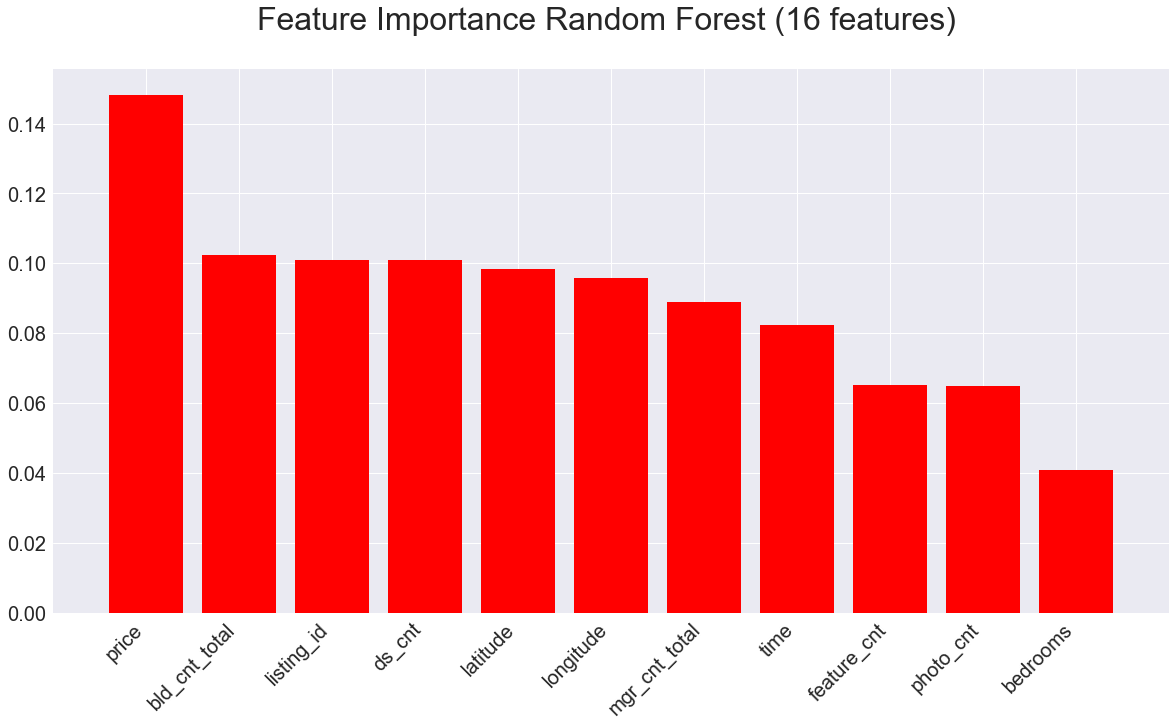

In [155]:
def feat_imp(df, model, n_features):

    d = dict(zip(df.columns, model.feature_importances_))
    ss = sorted(d, key=d.get, reverse=True)
    top_names = ss[0:n_features]
    plt.figure(figsize=(20,10))

    plt.figure(figsize=(20,10))
    plt.title("Feature Importance Random Forest (16 features) \n", fontsize=32)
   
    plt.yticks(fontsize=20)
    plt.bar(range(n_features), [d[i] for i in top_names], color="r", align="center")
    plt.xlim(-1, n_features)
    plt.xticks(range(n_features), top_names, rotation=45, fontsize=20, ha = 'right')

feat_imp(X_train,clf, 11)

In [156]:
X_all = pd.concat([X_d,X_test_d]).sort_index()
y_all = pd.concat([y, pd.Series(y_test, index= X_test.index)]).sort_index()
data_all = pd.concat([data.sort_index(),data_test.sort_index()])
data_all['interest_level'] = y_all
data_all

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
4,1.0,1,5070,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",medium,40.7108,7170325,-73.9539,275,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place
6,1.0,2,900,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",low,40.7513,7092344,-73.9722,361,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th
9,1.0,2,570,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",medium,40.7575,7158677,-73.9625,236,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street
10,1.5,3,1,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,1,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
15,1.0,0,11,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",low,40.7439,7225292,-73.9743,212,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street
16,1.0,3,69,2016-06-28 05:59:06,This spectacular converted 3 bed apartment all...,East 16th Street,"[Doorman, Elevator, Loft, Dishwasher, Hardwood...",low,40.7348,7226687,-73.9865,140,[https://photos.renthop.com/2/7226687_4ea22bf1...,7200,145 East 16th Street
18,2.0,3,172,2016-06-08 06:21:36,AMAZING DEAL!! BRAND NEW RENOVATIONS IN THIS H...,East 13th Street,"[Fireplace, Laundry in Unit, Dishwasher, Hardw...",low,40.7302,7126989,-73.9826,257,[https://photos.renthop.com/2/7126989_a74ab3da...,6000,410 East 13th Street
19,1.0,0,619,2016-06-05 05:28:22,No Fee Large Renovated Sun Splashed Studio. Wa...,York Avenue,"[Elevator, Laundry in Building, Dishwasher, Ha...",high,40.7769,7114138,-73.9467,520,[https://photos.renthop.com/2/7114138_68d035c3...,1945,1661 York Avenue
23,0.0,1,4068,2016-06-09 04:42:03,Extra large one bedroom apartment located in P...,E 19 Street,[Hardwood Floors],low,40.7346,7131094,-73.9811,714,[https://photos.renthop.com/2/7131094_2117d8a9...,2435,346 E 19 Street
32,3.0,3,4630,2016-06-28 03:26:18,Listed: 06/26/16<br /><br />Available:...,Hicks Street,"[Cats Allowed, Dogs Allowed]",low,40.6990,7224815,-73.9943,578,[https://photos.renthop.com/2/7224815_8ff8a811...,6850,94 Hicks Street


In [157]:
# CONVERT MANAGER_ID INTO MANGER SKILLS

# Mangers count in low, medium, high
mgr_l = data_all[data_all['interest_level'] == 'low'].groupby('manager_id')['manager_id'].count().to_frame('mgr_cnt_l')
mgr_m = data_all[data_all['interest_level'] == 'medium'].groupby('manager_id')['manager_id'].count().to_frame('mgr_cnt_m')
mgr_h = data_all[data_all['interest_level'] == 'high'].groupby('manager_id')['manager_id'].count().to_frame('mgr_cnt_h')
mgr_t = data_all.groupby('manager_id')['manager_id'].count().to_frame('mgr_cnt_total')

# Saving all results in DataFrame
result = pd.merge(mgr_l, mgr_m, left_index=True, right_index=True, how='outer')
result = pd.merge(result, mgr_h, left_index=True, right_index=True, how='outer')
result = pd.merge(result, mgr_t, left_index=True, right_index=True, how='outer')
result = result.reset_index()
result['mgr_skill_h'] = result.mgr_cnt_h/result.mgr_cnt_total
result['mgr_skill_m'] = result.mgr_cnt_m/result.mgr_cnt_total
result['mgr_skill_l'] = result.mgr_cnt_l/result.mgr_cnt_total
result_mgr = result.fillna(0)

result_mgr.head()

/Users/peterkay/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:722: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  sort=self.sort)


,manager_id,mgr_cnt_l,mgr_cnt_m,mgr_cnt_h,mgr_cnt_total,mgr_skill_h,mgr_skill_m,mgr_skill_l
0,1,67.0,23.0,0.0,90,0.000000,0.255556,0.744444
1,2,85.0,1.0,0.0,86,0.000000,0.011628,0.988372
2,3,77.0,49.0,8.0,134,0.059701,0.365672,0.574627
3,4,154.0,24.0,13.0,191,0.068063,0.125654,0.806283
4,5,15.0,0.0,0.0,15,0.000000,0.000000,1.000000


In [158]:
# CONVERT BUILDING_ID INTO BUILDING POPULARITY

# Building count in low, medium, high
building_l = data_all[data_all['interest_level'] == 'low'].groupby('building_id')['building_id'].count().to_frame('bld_cnt_l')
building_m = data_all[data_all['interest_level'] == 'medium'].groupby('building_id')['building_id'].count().to_frame('bld_cnt_m')
building_h = data_all[data_all['interest_level'] == 'high'].groupby('building_id')['building_id'].count().to_frame('bld_cnt_h')
building_t = data_all.groupby('building_id')['building_id'].count().to_frame('bld_cnt_total')

# Saving all results in DataFrame
result = pd.merge(building_l, building_m, left_index=True, right_index=True, how='outer')
result = pd.merge(result, building_h, left_index=True, right_index=True, how='outer')
result = pd.merge(result, building_t, left_index=True, right_index=True, how='outer')
result = result.reset_index()
result['bld_pop_h'] = result.bld_cnt_h/result.bld_cnt_total
result['bld_pop_m'] = result.bld_cnt_m/result.bld_cnt_total
result['bld_pop_l'] = result.bld_cnt_l/result.bld_cnt_total
result_bld = result.fillna(0)
result_bld.head()

/Users/peterkay/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:722: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  sort=self.sort)


,building_id,bld_cnt_l,bld_cnt_m,bld_cnt_h,bld_cnt_total,bld_pop_h,bld_pop_m,bld_pop_l
0,1,2.0,1.0,0.0,3,0.000000,0.333333,0.666667
1,2,22.0,2.0,0.0,24,0.000000,0.083333,0.916667
2,3,22.0,26.0,10.0,58,0.172414,0.448276,0.379310
3,4,89.0,9.0,1.0,99,0.010101,0.090909,0.898990
4,5,7588.0,503.0,195.0,8286,0.023534,0.060705,0.915762


In [159]:
X_temp = data_all.reset_index()
X_temp = pd.merge(X_temp, result_bld[['building_id','bld_pop_h','bld_pop_m','bld_pop_l']], how='outer', right_index=False)
X_temp = pd.merge(X_temp, result_mgr[['manager_id','mgr_skill_h','mgr_skill_m','mgr_skill_l']], how='outer', right_index=False)
X_temp = X_temp[~X_temp['index'].isnull()]
X_temp['index'] = X_temp['index'].astype(int)
X_temp = X_temp.fillna(0)
X_temp = X_temp.set_index('index').sort_index()
del X_temp.index.name
X_temp

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,...,manager_id,photos,price,street_address,bld_pop_h,bld_pop_m,bld_pop_l,mgr_skill_h,mgr_skill_m,mgr_skill_l
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",low,40.7185,7142618,...,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street,0.000000,0.000000,1.000000,0.026316,0.157895,0.815789
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",low,40.7278,7210040,...,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street,0.000808,0.003070,0.996122,0.000000,0.000000,1.000000
2,1.0,0,0,2016-06-17 01:23:39,Spacious studio in Prime Location. Cleanbuildi...,Sullivan Street,"[Pre-War, Dogs Allowed, Cats Allowed]",low,40.7260,7174566,...,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/7174566_ba3a35c5...,2295,115 Sullivan Street,0.000808,0.003070,0.996122,0.027244,0.055786,0.916969
3,1.0,2,f9c826104b91d868e69bd25746448c0c,2016-06-21 05:06:02,For immediate access call Bryan.<br /><br />Bo...,Jones Street,"[Hardwood Floors, Dogs Allowed, Cats Allowed]",medium,40.7321,7191391,...,41735645e0f8f13993c42894023f8e58,[https://photos.renthop.com/2/7191391_8c2f2d49...,2900,23 Jones Street,0.000000,0.500000,0.500000,0.017045,0.073864,0.909091
4,1.0,1,5070,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",medium,40.7108,7170325,...,275,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,0.000000,0.600000,0.400000,0.053571,0.419643,0.526786
5,1.0,1,81062936e12ee5fa6cd2b965698e17d5,2016-06-16 07:24:27,Beautiful TRUE 1 bedroom in a luxury building ...,Exchange Place,"[Roof Deck, Doorman, Elevator, Fitness Center,...",low,40.7054,7171695,...,a742cf7dd3b2627d83417bc3a1b3ec96,[https://photos.renthop.com/2/7171695_089ffee2...,3254,20 Exchange Place,0.021277,0.031915,0.946809,0.000000,0.228571,0.771429
6,1.0,2,900,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",low,40.7513,7092344,...,361,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,0.058824,0.411765,0.529412,0.038462,0.615385,0.346154
7,2.0,2,3a956bd42c50f06ac84cf072fc514f5f,2016-06-28 03:44:52,Beautiful 2 bedroom unit with 2 full bathrooms...,W 42nd St.,"[Cats Allowed, Dogs Allowed, No Fee, Doorman, ...",low,40.7610,7225206,...,93e03c5179b8f3229fc1c63c0f75d11b,[https://photos.renthop.com/2/7225206_6b8ac259...,4990,650 W 42nd St.,0.000000,0.086093,0.913907,0.000000,0.068966,0.931034
8,3.5,4,628ccc8b016abf804bdf7ae77167cfe3,2016-06-22 05:14:51,,Irving Pl,"[Elevator, Cats Allowed, Dogs Allowed]",low,40.7358,7200075,...,7422eabb4c6c3448c000f7be84e5c1b8,[https://photos.renthop.com/2/7200075_abfbded7...,20000,47 Irving Pl,0.000000,0.000000,1.000000,0.007874,0.031496,0.960630
9,1.0,2,570,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",medium,40.7575,7158677,...,236,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,0.028169,0.352113,0.619718,0.032258,0.204301,0.763441


In [160]:
X_all[['bld_pop_h','bld_pop_m', 'bld_pop_l', 'mgr_skill_h', 'mgr_skill_m', 'mgr_skill_l']] = X_temp[['bld_pop_h','bld_pop_m', 'bld_pop_l', 'mgr_skill_h', 'mgr_skill_m', 'mgr_skill_l']]
X_all
y_all = y_all.sort_index()
y_all.ix[X_test.index]

/Users/peterkay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


0            low
1            low
2            low
3         medium
5            low
7            low
8            low
11        medium
12           low
13           low
14           low
17           low
20           low
21           low
22           low
24           low
25           low
26        medium
27        medium
28           low
29           low
30           low
31        medium
34           low
35           low
37           low
40           low
41           low
45           low
47           low
           ...  
123952       low
123954       low
123955       low
123956       low
123957       low
123959       low
123960       low
123962       low
123967       low
123968       low
123969       low
123971      high
123973       low
123974       low
123978       low
123981       low
123983       low
123988       low
123989       low
123990       low
123993       low
123994       low
123997       low
123999       low
124001      high
124003       low
124005       low
124006       l

In [161]:
X_test_new = X_all.ix[X_test.index]
X_test_new

/Users/peterkay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,listing_id,bathrooms,bedrooms,latitude,longitude,price,bld_cnt_total,mgr_cnt_total,feature_cnt,ds_cnt,time,photo_cnt,bld_pop_h,bld_pop_m,bld_pop_l,mgr_skill_h,mgr_skill_m,mgr_skill_l
0,7142618.0,1.0,1.0,40.7185,-73.9865,2950.0,5.0,38.0,6.0,76.0,163.0,8.0,0.000000,0.000000,1.000000,0.026316,0.157895,0.815789
1,7210040.0,1.0,2.0,40.7278,-74.0000,2850.0,12378.0,17.0,3.0,34.0,176.0,3.0,0.000808,0.003070,0.996122,0.000000,0.000000,1.000000
2,7174566.0,1.0,0.0,40.7260,-74.0026,2295.0,12378.0,3854.0,3.0,38.0,169.0,1.0,0.000808,0.003070,0.996122,0.027244,0.055786,0.916969
3,7191391.0,1.0,2.0,40.7321,-74.0028,2900.0,10.0,176.0,3.0,20.0,173.0,4.0,0.000000,0.500000,0.500000,0.017045,0.073864,0.909091
5,7171695.0,1.0,1.0,40.7054,-74.0095,3254.0,94.0,35.0,10.0,83.0,168.0,6.0,0.021277,0.031915,0.946809,0.000000,0.228571,0.771429
7,7225206.0,2.0,2.0,40.7610,-73.9983,4990.0,151.0,87.0,12.0,132.0,180.0,8.0,0.000000,0.086093,0.913907,0.000000,0.068966,0.931034
8,7200075.0,3.5,4.0,40.7358,-73.9877,20000.0,2.0,127.0,3.0,0.0,174.0,15.0,0.000000,0.000000,1.000000,0.007874,0.031496,0.960630
11,7145074.0,1.0,0.0,40.7814,-73.9507,2150.0,17.0,111.0,5.0,88.0,164.0,3.0,0.000000,0.117647,0.882353,0.009009,0.261261,0.729730
12,7193645.0,2.0,4.0,40.7216,-73.9927,6500.0,29.0,56.0,1.0,0.0,173.0,7.0,0.000000,0.034483,0.965517,0.000000,0.000000,1.000000
13,7147703.0,1.0,1.0,40.7553,-73.9953,3365.0,46.0,7.0,3.0,0.0,164.0,18.0,0.000000,0.086957,0.913043,0.000000,0.000000,1.000000


In [162]:
X_all_train, X_all_val, y_all_train, y_all_val = train_test_split(X_all, y_all, test_size=0.33,random_state = 0)
clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)
clf.fit(X_all_train, y_all_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [163]:
X_test_new = X_test_new.fillna(0)
y_val_pred = clf.predict_proba(X_test_new)
log_loss(y_test, y_val_pred)

0.058531983867238874

In [164]:
y_pred = clf.predict(X_test_new)
sum(y_test == y_pred)/len(y_test)

0.98436893073842402

In [165]:
X_test_new = X_all.ix[X_test.index]
X_test_new = X_test_new.fillna(0)

In [166]:
y_test_proba_clf_gr_cv = clf.predict_proba(X_test_new)

a = pd.DataFrame({'high':y_test_proba_clf_gr_cv[:, 0], 
'medium':y_test_proba_clf_gr_cv[:, 2], 
'low':y_test_proba_clf_gr_cv[:, 1]}, columns = ['high', 'medium', 'low'])
a.index = X_test.sort_index()['listing_id'].values.astype(int)

a.index.name = 'listing_id'
a.to_csv("submit_1.csv")
clf.classes_

array(['high', 'low', 'medium'], dtype=object)

In [167]:
d = {'low': 0, 'medium': 1, 'high':2}
y = y.map(d)

## Step 7. Try XGBoost classifier for dataset

In [168]:
clf_xgb = xgb.XGBClassifier(nthread = -1, objective = 'multi:softprob', learning_rate = 0.1, max_depth= 5, n_estimators= 1000, reg_lambda = 9)
clf_xgb.fit(X_train, y_train, eval_metric = 'mlogloss')

y_val_pred = clf_xgb.predict_proba(X_val)
#y_val.values
log_loss(y_val.values, y_val_pred)

0.58015638373881639

In [169]:
y_test_proba_clf_gr_cv = clf_xgb.predict_proba(X_test_d)

a = pd.DataFrame({'high':y_test_proba_clf_gr_cv[:, 2], 
'medium':y_test_proba_clf_gr_cv[:, 1], 
'low':y_test_proba_clf_gr_cv[:, 0]}, columns = ['high', 'medium', 'low'])
a.index = X_test['listing_id'].values.astype(int)

a.index.name = 'listing_id'
a.to_csv("submit_1.csv")
clf.classes_

array(['high', 'low', 'medium'], dtype=object)

## Additional code

In [170]:
ph_data0 = pd.read_csv('photo(1-10000).csv')
ph_data0 = ph_data0.set_index('Unnamed: 0')
del ph_data0.index.name

ph_data1 = pd.read_csv('photo(10000-20000).csv')
ph_data1 = ph_data1.set_index('Unnamed: 0')
del ph_data1.index.name

ph_data2 = pd.read_csv('photo(20000-30000).csv')
ph_data2 = ph_data2.set_index('Unnamed: 0')
del ph_data2.index.name

ph_data3 = pd.read_csv('photo(30000-40000).csv')
ph_data3= ph_data3.set_index('Unnamed: 0')
del ph_data3.index.name

ph_data4 = pd.read_csv('photo(40000-50000).csv')
ph_data4 = ph_data4.set_index('Unnamed: 0')
del ph_data4.index.name

ph_data = pd.concat([ph_data0, ph_data1, ph_data2, ph_data3, ph_data4])
ph_data = ph_data.fillna(0)
ph_data = ph_data.drop(['listing_id', 'photo_cnt'], axis=1)
ph_data.to_csv('photo_data_train.csv')

# ph_data0 = pd.read_csv('photo_test(0-10000).csv')
ph_data0 = ph_data0.set_index('Unnamed: 0')
del ph_data0.index.name

ph_data1 = pd.read_csv('photo_test(10000-20000).csv')
ph_data1 = ph_data1.set_index('Unnamed: 0')
del ph_data1.index.name

ph_data2 = pd.read_csv('photo_test(20000-30000).csv')
ph_data2 = ph_data2.set_index('Unnamed: 0')
del ph_data2.index.name

ph_data3 = pd.read_csv('photo_test(30000-40000).csv')
ph_data3= ph_data3.set_index('Unnamed: 0')
del ph_data3.index.name

ph_data4 = pd.read_csv('photo_test(40000-50000).csv')
ph_data4 = ph_data4.set_index('Unnamed: 0')
del ph_data4.index.name

ph_data5 = pd.read_csv('photo_test(50000-60000).csv')
ph_data5 = ph_data5.set_index('Unnamed: 0')
del ph_data5.index.name
ph_data6 = pd.read_csv('photo_test(60000-70000).csv')
ph_data6 = ph_data6.set_index('Unnamed: 0')
del ph_data6.index.name
ph_data7 = pd.read_csv('photo_test(70000-80000).csv')
ph_data7 = ph_data7.set_index('Unnamed: 0')
del ph_data7.index.name

ph_data = pd.concat([ph_data0, ph_data1, ph_data2, ph_data3, ph_data4, ph_data5, ph_data6, ph_data7])
ph_data = ph_data.fillna(0)
ph_data = ph_data.drop(['listing_id', 'photo_cnt'], axis=1)
ph_data
ph_data.to_csv('photo_data_test.csv')